# Evolutionary simulations with Evodoodle

Today, you will build on your experiences running evolutionary simulations with Geonomics to run simulations across your own custom landscapes. To do this, we will be using a python package called Evodoodle, which allows us to draw landscapes and then simulate evolution across them. Under the hood, Evodoodle uses Geonomics to run these simulations, so a lot of what you will see in this lab will be similar to our Geonomics labs. The key difference is that we will be able to control the configuration of the landscapes that drive population size, connectivity and local adaptation. This gives us the power to explore how the forces of evolution act across different landscapes, which we will use to answer real-world conservation questions.

## Helpful Reminders:

### Text cells
In a notebook, each rectangle containing text or code is called a cell.

Text cells (like this one) can be edited by double-clicking on them. They're written in a simple format called Markdown to add formatting and section headings. You don't need to learn Markdown, but you might want to.

After you edit a text cell, click the "run cell" button at the top to confirm any changes. (Try not to delete the instructions of the lab.)

### Code cells
Other cells contain code in the Python 3 language. Running a code cell will execute all of the code it contains.

To run the code in a code cell, first click on that cell to activate it. It'll be highlighted with a little green or blue rectangle. Next, either press the Run button or hold down the shift key and press return or enter.

### Creating and deleting cells
To create a new code cell, click on the cell (but not inside it) and then type "b" to create a cell below and "a" to create a cell above. To delete a code cell, click on the cell and then type "dd". To change the cell to markdown, click on the cell and type "m" and to change it to a code cell type "Y" (Shift + Y).

### Comments
Comments are statements in English that the computer ignores. We use comments to explain what the surrounding code does. Comments appear after the # symbol.

# Import packages
Run the following cell to bring in the necessary Python packages for our exercise today. Recall that you need to run this cell and any cells above the one you are working on each time you relaunch the notebook.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import geonomics as gnx
import evodoodle as evo
import warnings
warnings.filterwarnings('ignore')

# Set-up interactive display for GitHub codespaces

**BEFORE YOU START: Evodoodle requires an interactive display for drawing which takes a few simple steps to set-up on GitHub codespaces.** We have a virtual desktop which you can acccess by:
1. Clicking the `Ports` tab at the bottom of the screen in codespaces
2. Find the `desktop (6080)` port in the list (it should be the first one)
3. Click `Open in Browser` in the `Forwarded Address` column for `desktop (6080)` (click the button that looks like a globe next to the link or `Ctrl + click` the link). 
4. This will open a new tab with the interactive display called noVNC. To start the display click Connect. The screen will initially appear blank, but when you run the code to draw a landscape (i.e., run `evo.draw_landscape()`) the landscape will appear in the noVNC display tab. Once you have drawn your landscape, click SAVE and the code will continue in your codespace tab.

# Part 1: Introduction to Evodoodle

Evodoodle allows us to "doodle" our own landscapes using an interactive window. Whenever `evo.draw_landscape()` is run a pop-up will appear that allows you to draw on a landscape by clicking on the cells of the landscape. Once you have drawn your landscape, click the SAVE button and the code will continue.

Evodoodle allows us to control three different landscapes for our simulations:

1. **Carrying capacity** - this landscape controls the number of individuals that each landscape cell can support. This landscape is particularly useful for creating barriers by drawing areas that have a carrying capacity of zero.

2. **Connectivity** - this landscape controls how easily individuals can move through each cell.

3. **Environment** - this landscape defines the environmental gradient that our species will adapt to. The species has a single trait that is selected upon based on this environmental layer.

*By default all three of these landscapes have a uniform value of one; you can leave these landscapes as the default if you want to experiment with modifying just one or two landscapes at a time.* **You do not need to customize every landscape in your simulations and you often will not want to.**

### 1. Draw your landscape

Try it out for yourselves! Doodle some landscapes by running the code chunks below. Remember that if you are using the GitHub codespace you will need to go to the noVNC tab to draw on and save your landscape. **When you run evo.draw_landscape() you may get errors that start with "ALSA", you can ignore these.**

Also note that you can potentially drive your species extinct if carrying capacity is too low across the landscape, so if your simulation fails, try running it again with a different carrying capacity configuration.

In [15]:
# Draw your landscape carrying capacity
# When you run this chunk a pop-up will appear where you can draw on your own landscape
# Note: d sets the dimensions of your square landscape in terms of the number of cells
carrying_capacity = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card 'PCH'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such device
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such device
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such device
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such device
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [16]:
# Draw your landscape connectivity
connectivity = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card 'PCH'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such device
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such device
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such device
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such device
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [17]:

# Draw your environment for local adaptation
environment = evo.draw_landscape(d = 10)


ALSA lib confmisc.c:855:(parse_card) cannot find card 'PCH'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such device
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such device
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such device
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such device
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


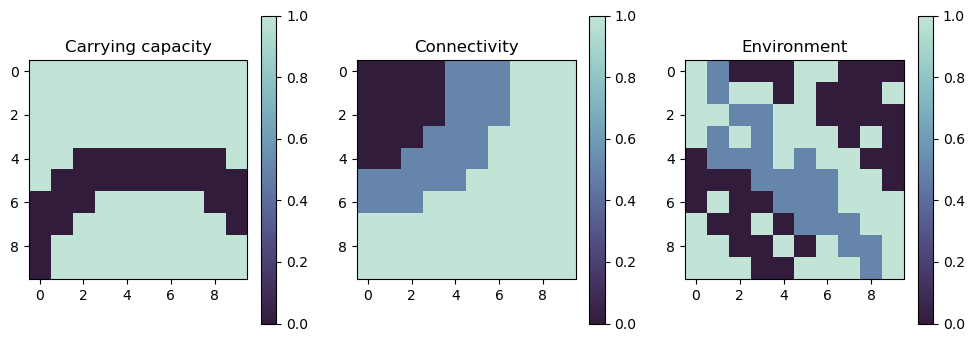

In [18]:
%matplotlib inline
# You can plot all your landscapes using plot_landscapes()
evo.plot_landscapes(carrying_capacity, connectivity, environment)

In [19]:
# If you want to change something, you can edit your landscapes using the edit_landscape() function (uncomment the lines below if you want to any of your landscapes)
# carrying_capacity = evo.edit_landscape(carrying_capacity)
# connectivity = evo.edit_landscape(connectivity)
# environment = evo.edit_landscape(environment)

### 2. Simulate evolution across your landscape

Now that you have your custom landscapes, you can simulate evolution across them!

In [20]:

%%capture
# Evodoodle comes with an example parameters dictionary which we will use for our simulations today:
params = evo.example_params()
# Initialize our model
mod = evo.init_mod(params, carrying_capacity, connectivity, environment)


stty: 'standard input': Inappropriate ioctl for device


Evodoodle has a special function for plotting our simulations called `plot_popgen()`.  This function produces four plots.

1. **PCA plot in PCA space** - this plot shows each individual plotted in genetic PC space. The closer individuals are together in PC space, the more similar they are. They also are colored based on the PCs to help in interpretation of the PCA map (Plot 2); more similar the colors = more genetically similar individuals.

2. **PCA plot in landscape space** - this plot shows each individual plotted across the landscape, colored based on the genetic PCs; more similar the colors = more genetically similar individuals. By default, the "background" of this plot is the carrying capacity landscape, however this background is just for visualization purposes and could theoretically be set to any of the three layers (i.e., carrying capacity, connectivity, or environment).

3. **Heterozygosity plot** - this plot shows each individual plotted across the landscape, colored based on their heterozygosity. This allows us to see how genetic diversity varies across space. The background of this plot is the connectivity landscape, however this background is just for visualization purposes and could theoretically be set to any of the three layers (i.e., carrying capacity, connectivity, or environment).

4. **Phenotype-environment plot** - this plot shows each individual plotted across the landscape, colored based on their phenotype. The background is the environmental layer driving selection on this phenotype. Matching between the individual's color and the background color indicates that local adaptation is occurring.

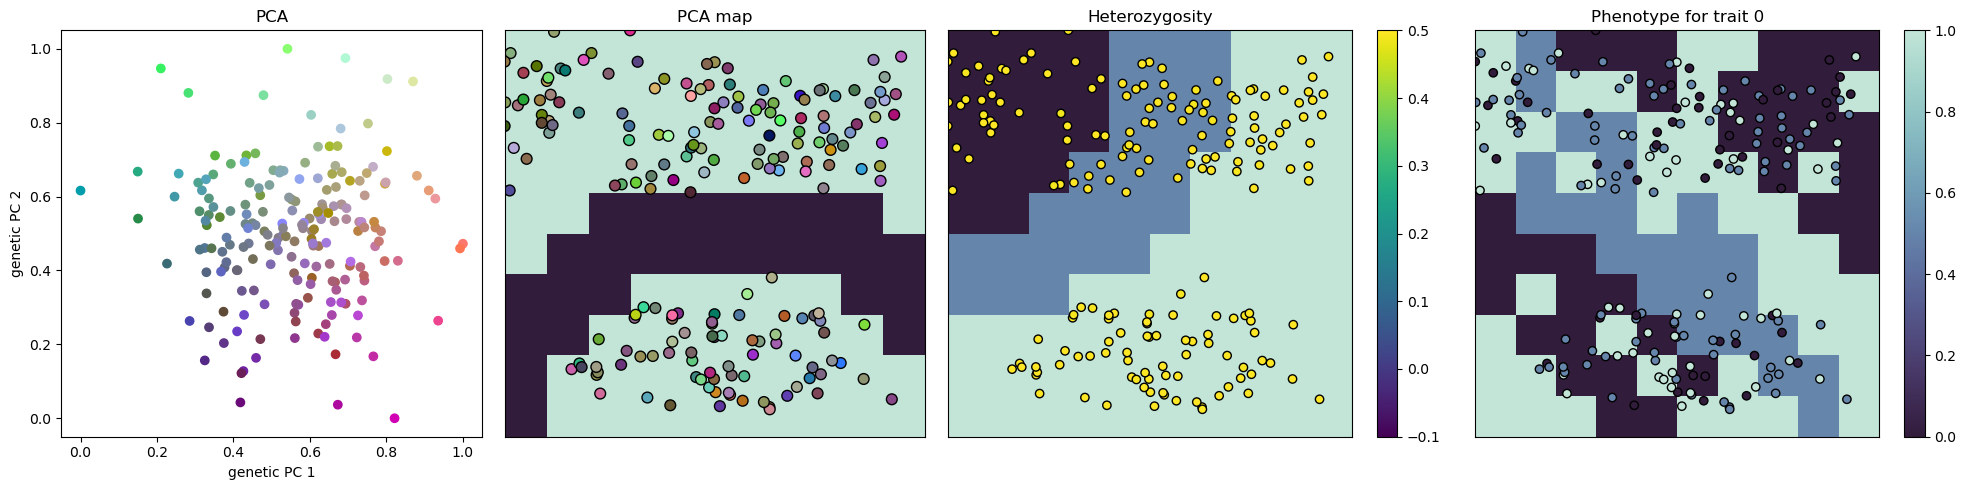

In [21]:
# Plot initial model (no selection has occurred yet)
evo.plot_popgen(mod)

In [22]:
# Run the model for 100 steps
mod.walk(100)



main:	it=-1:	t=0
	species: spp_0                         N=186	(births=37	deaths=42)

	........................................................................
main:	it=-1:	t=1
	species: spp_0                         N=176	(births=35	deaths=45)

	........................................................................
main:	it=-1:	t=2
	species: spp_0                         N=183	(births=34	deaths=27)

	........................................................................
main:	it=-1:	t=3
	species: spp_0                         N=188	(births=36	deaths=31)

	........................................................................
main:	it=-1:	t=4
	species: spp_0                         N=195	(births=37	deaths=30)

	........................................................................
main:	it=-1:	t=5
	species: spp_0                         N=195	(births=31	deaths=31)

	........................................................................
main:	it=-1:	t=6
	species: spp_0      

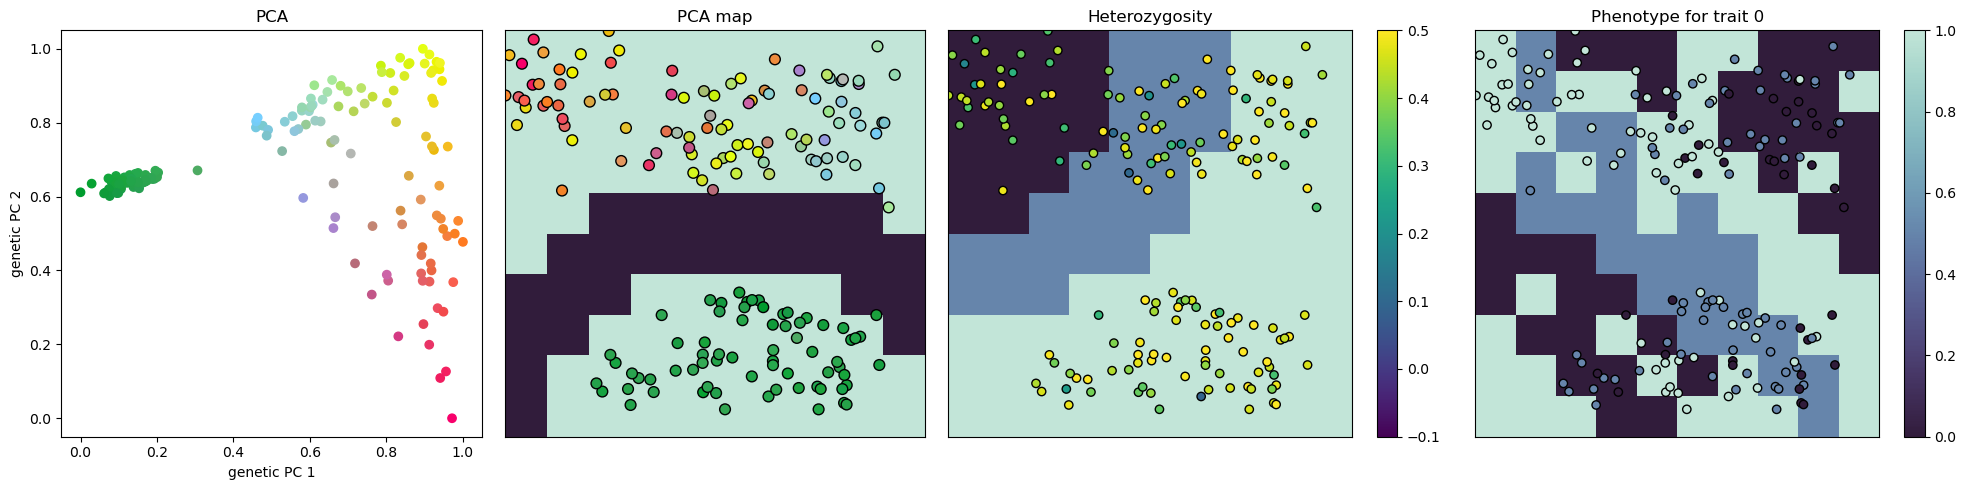

In [23]:

# Plot the results
evo.plot_popgen(mod)

In [24]:

# Run the model for another 100 steps
mod.walk(100)

main:	it=-1:	t=100
	species: spp_0                         N=162	(births=35	deaths=38)

	........................................................................
main:	it=-1:	t=101
	species: spp_0                         N=162	(births=31	deaths=31)

	........................................................................
main:	it=-1:	t=102
	species: spp_0                         N=173	(births=26	deaths=15)

	........................................................................
main:	it=-1:	t=103
	species: spp_0                         N=179	(births=40	deaths=34)

	........................................................................
main:	it=-1:	t=104
	species: spp_0                         N=187	(births=34	deaths=26)

	........................................................................
main:	it=-1:	t=105
	species: spp_0                         N=180	(births=33	deaths=40)

	........................................................................
main:	it=-1:	t=106
	species:

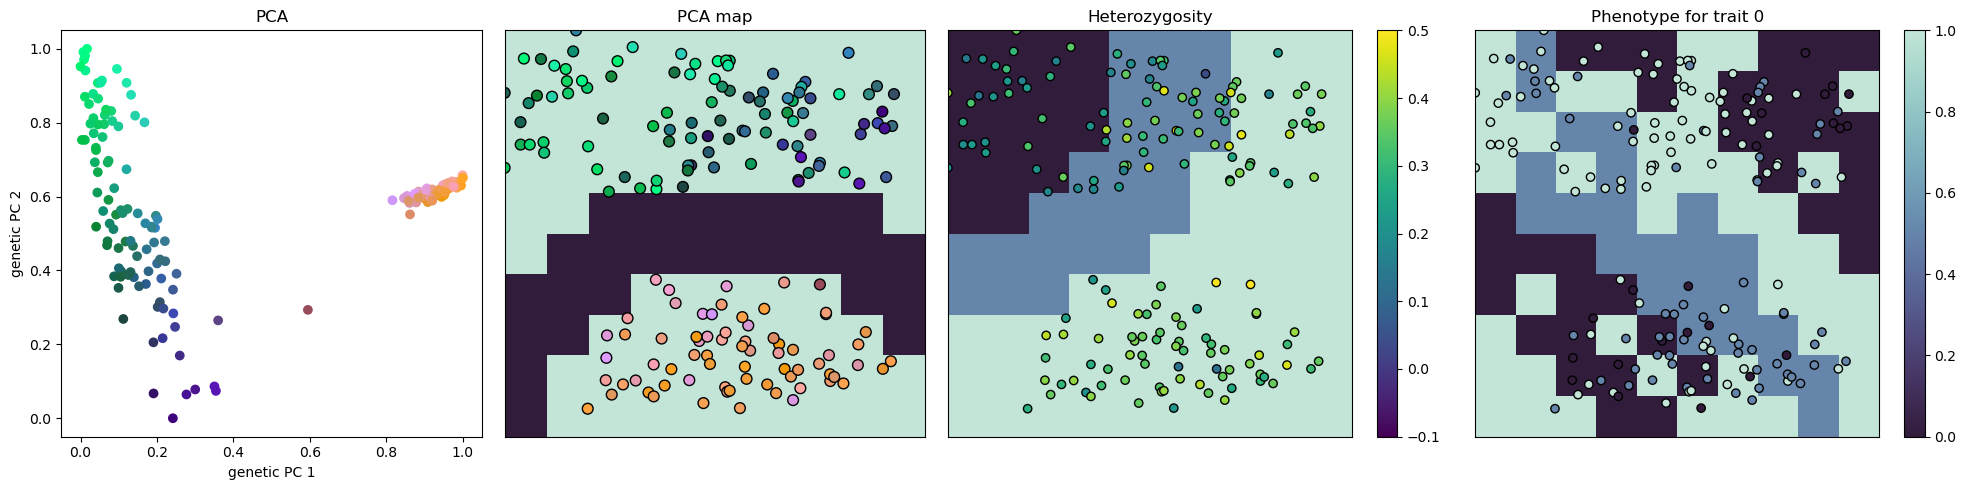

In [25]:

evo.plot_popgen(mod)

# Part 2: Answering real-world questions with Evodoodle

Now that you have played around with Evodoodle, let's apply it to answering some evolutionary and conservation questions. You will have to decide how you want to design your landscapes to answer the question at hand. We will walk through the first exercise together. Remember our hypothesis testing framework from last time:

If we [**change our landscape**], then [**outcome with evidence**] because [**justification**]

For each simulation, think about what your hypothesis is and how you will evaluate it based on your results.

**As you run your simulations, consider some of the advantages and limitations of these types of simplified representations of real-world processes.** How are your landscapes similar/different from real landscapes? What other variables would you need to consider in your decision making process? How might your findings be misinterpreted and what might the consequences be? What kind of empirical data would you want to collect to evaluate the findings of your simulations?

### Simulation tips

1. You do not have to customize every landscape (e.g. population size, connectivity, and environment), often you may want to just change one landscape and leave the rest uniform.

2. To evaluate your results you should consider both neutral and adaptive processes (though sometimes only one will apply). Remember that you can use your PCA plots to assess genetic differentiation, your phenotype-environment plots to assess local adaptation, and your heterozygosity plots to assess genetic diversity.

3. If you are interested in changes in heterozygosity, you may need to run your simulations for a longer period of time (300-500 generations or more).

### Coding tips

Most of the code for these exercises is provided for you or requires minimal editing or copy-pasting. However, you may find it helpful to edit the code below and make use of the following functions: 


1. `evo.draw_landscape()` - make a new landscape. d sets the dimensions of your square landscape in terms of the number of cells.

    Example: 
    ```python
    new_landscape = evo.draw_landscape(d = 10)
    ```

2. `evo.edit_landscape()` - edit an existing landscape. This can be helpful for when you want to run two simulations and modify your first set of landscapes while keep some things the same. 

    Example: 
    ```python
    edited_landscape = evo.edit_landscape(new_landscape)
    ```

You can also copy landscapes. For example, let's say you want carrying capacity and connectivity to be the same:
```python
population_size = evo.draw_landscape(d = 10)
population_size = carrying_capacity
```

**The names of the landscapes you create don't matter, but the order when you put them into `evo.init_mod()` does.** The arguments must always be in the order: params, carrying_capacity, connectivity, environment, population_size:

```python
evo.init_mod(params, carrying_capacity, connectivity, environment)
```

You can also set them like normal arguments by specifying which landscape is which, in which case order doesn't matter.

```python
evo.init_mod(params = your_params, carrying_capacity = your_landscape1, connectivity = your_landscape2, environment = your_landscape3)


## Exercise 1: Evaluating the effectiveness of a wildlife corridors

Wildlife corridors are a popular method for restoring connectivity between areas fragmented by human development, such as roads. In our previous lab, we used simulations to show how a barrier can result in population divergence. Let's test to see the effect of building a barrier, but including a corridor across it that individuals can pass through.

To test this question we will run three simulations: 
1. A simulation with no barrier
2. A simulation with a barrier and no corridor
3. A simulation with a barrier and with a corridor

For these simulations, we will keep our environment uniform (i.e., no selection).

In [13]:
# I am creating a uniform landscape that we will use for our connectivity and environment landscapes
uniform_landscape = np.ones((10,10))
environment = uniform_landscape
connectivity = uniform_landscape
# We will also use a uniform landscape for carrying capacity for our first simulation, but we will change it later
carrying_capacity = uniform_landscape

First, let's run our null simulation with no barrier or corridor:

In [ ]:
# Initialize and run our model
mod1 = evo.init_mod(params, carrying_capacity, connectivity, environment)
mod1.walk(200)
evo.plot_popgen(mod1)

Now, create your carrying capacity landscape with a barrier by creating a line of zero value cells dividing the landscape. How you draw this barrier is up to you.

In [15]:
# Create our carrying capacity barrier landscape
carrying_capacity_barrier = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default



MAKING MODEL...

	MAKING LANDSCAPE...

	MAKING COMMUNITY...

		MAKING SPECIES spp_0...

			making genomic architecture...



stty: 'standard input': Inappropriate ioctl for device


			making individuals...

			making movement surface...
				[can take a bit]



No mod.burn_fn_queue was found. Running mod.reset()...


Creating the burn-in function queue...


Creating the main function queue...


burn:	it=-1:	t=0
	species: spp_0                         N=358	(births=99	deaths=241)

	........................................................................
burn:	it=-1:	t=1
	species: spp_0                         N=306	(births=82	deaths=134)

	........................................................................
burn:	it=-1:	t=2
	species: spp_0                         N=269	(births=55	deaths=92)

	........................................................................
burn:	it=-1:	t=3
	species: spp_0                         N=263	(births=49	deaths=55)

	........................................................................
burn:	it=-1:	t=4
	species: spp_0                         N=255	(births=46	deaths=54)

	.......................................................

/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=35
	species: spp_0                         N=225	(births=37	deaths=50)

	........................................................................
burn:	it=-1:	t=36
	species: spp_0                         N=225	(births=43	deaths=43)

	........................................................................
burn:	it=-1:	t=37
	species: spp_0                         N=211	(births=53	deaths=67)

	........................................................................
burn:	it=-1:	t=38
	species: spp_0                         N=206	(births=49	deaths=54)

	........................................................................
burn:	it=-1:	t=39
	species: spp_0                         N=211	(births=43	deaths=38)

	........................................................................
burn:	it=-1:	t=40
	species: spp_0                         N=216	(births=53	deaths=48)

	........................................................................


/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=41
	species: spp_0                         N=203	(births=43	deaths=56)

	........................................................................
burn:	it=-1:	t=42
	species: spp_0                         N=215	(births=41	deaths=29)

	........................................................................
burn:	it=-1:	t=43
	species: spp_0                         N=206	(births=49	deaths=58)

	........................................................................
burn:	it=-1:	t=44
	species: spp_0                         N=201	(births=46	deaths=51)

	........................................................................
burn:	it=-1:	t=45
	species: spp_0                         N=205	(births=39	deaths=35)

	........................................................................
burn:	it=-1:	t=46
	species: spp_0                         N=202	(births=35	deaths=38)

	........................................................................


/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=47
	species: spp_0                         N=202	(births=45	deaths=45)

	........................................................................
burn:	it=-1:	t=48
	species: spp_0                         N=189	(births=34	deaths=47)

	........................................................................
burn:	it=-1:	t=49
	species: spp_0                         N=203	(births=44	deaths=30)

	........................................................................
burn:	it=-1:	t=50
	species: spp_0                         N=193	(births=29	deaths=39)

	........................................................................
burn:	it=-1:	t=51
	species: spp_0                         N=199	(births=46	deaths=40)

	........................................................................
burn:	it=-1:	t=52
	species: spp_0                         N=201	(births=40	deaths=38)

	........................................................................
burn:	it=-1:	t=53
	species: spp_0 

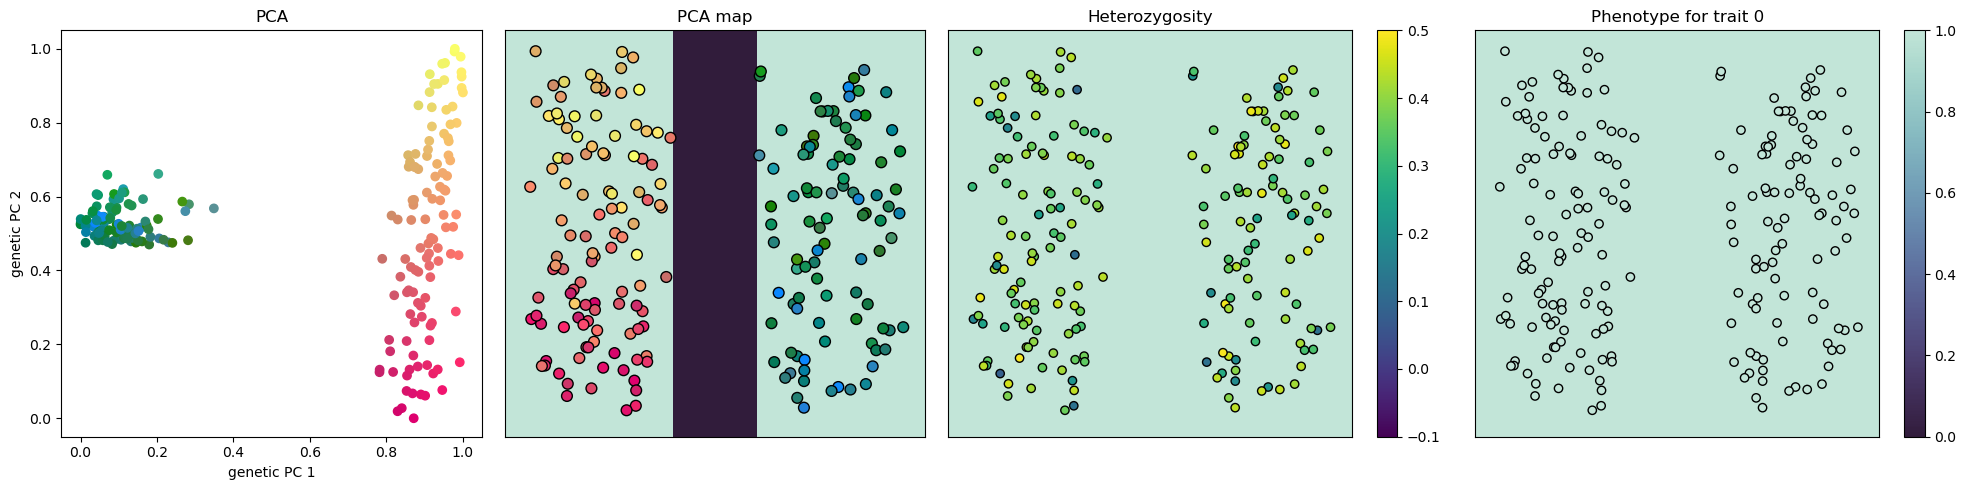

In [16]:
# Initialize and run our model
mod2 = evo.init_mod(params, carrying_capacity_barrier, connectivity, environment)
mod2.walk(200)
evo.plot_popgen(mod2)

Next, let's edit our barrier landscape to include a corridor. To create a corridor, replace a part of your zeros barrier with ones. You may want to try multiple corridor widths and see how that affects your results.

In [17]:
carrying_capacity_corridor = evo.edit_landscape(carrying_capacity_barrier)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default



MAKING MODEL...

	MAKING LANDSCAPE...

	MAKING COMMUNITY...

		MAKING SPECIES spp_0...

			making genomic architecture...



stty: 'standard input': Inappropriate ioctl for device


			making individuals...

			making movement surface...
				[can take a bit]



No mod.burn_fn_queue was found. Running mod.reset()...


Creating the burn-in function queue...


Creating the main function queue...


burn:	it=-1:	t=0
	species: spp_0                         N=374	(births=98	deaths=224)

	........................................................................
burn:	it=-1:	t=1
	species: spp_0                         N=335	(births=75	deaths=114)

	........................................................................
burn:	it=-1:	t=2
	species: spp_0                         N=316	(births=55	deaths=74)

	........................................................................
burn:	it=-1:	t=3
	species: spp_0                         N=282	(births=64	deaths=98)

	........................................................................
burn:	it=-1:	t=4
	species: spp_0                         N=277	(births=58	deaths=63)

	.......................................................

/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=37
	species: spp_0                         N=215	(births=47	deaths=40)

	........................................................................
burn:	it=-1:	t=38
	species: spp_0                         N=219	(births=51	deaths=47)

	........................................................................
burn:	it=-1:	t=39
	species: spp_0                         N=222	(births=41	deaths=38)

	........................................................................
burn:	it=-1:	t=40
	species: spp_0                         N=220	(births=27	deaths=29)

	........................................................................
burn:	it=-1:	t=41
	species: spp_0                         N=207	(births=41	deaths=54)

	........................................................................
burn:	it=-1:	t=42
	species: spp_0                         N=213	(births=35	deaths=29)

	........................................................................
burn:	it=-1:	t=43
	species: spp_0 

/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=44
	species: spp_0                         N=210	(births=43	deaths=38)

	........................................................................
burn:	it=-1:	t=45
	species: spp_0                         N=219	(births=42	deaths=33)

	........................................................................
burn:	it=-1:	t=46
	species: spp_0                         N=210	(births=47	deaths=56)

	........................................................................
burn:	it=-1:	t=47
	species: spp_0                         N=211	(births=36	deaths=35)

	........................................................................
burn:	it=-1:	t=48
	species: spp_0                         N=204	(births=46	deaths=53)

	........................................................................
burn:	it=-1:	t=49
	species: spp_0                         N=214	(births=39	deaths=29)

	........................................................................
burn:	it=-1:	t=50
	species: spp_0 

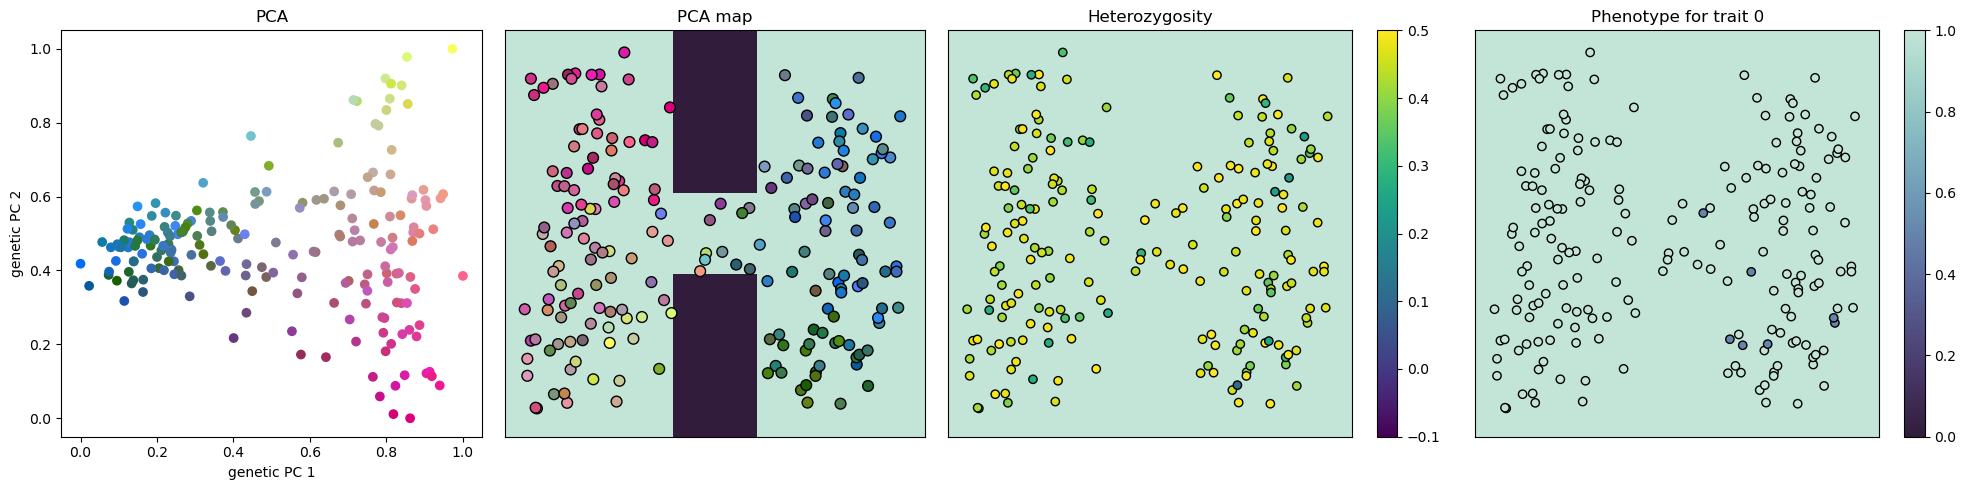

In [18]:
# Initialize and run our model
mod3 = evo.init_mod(params, carrying_capacity_corridor, connectivity, environment)
mod3.walk(200)
evo.plot_popgen(mod3)

Let's recreate our plots below for ease of comparison between our three scenarios:

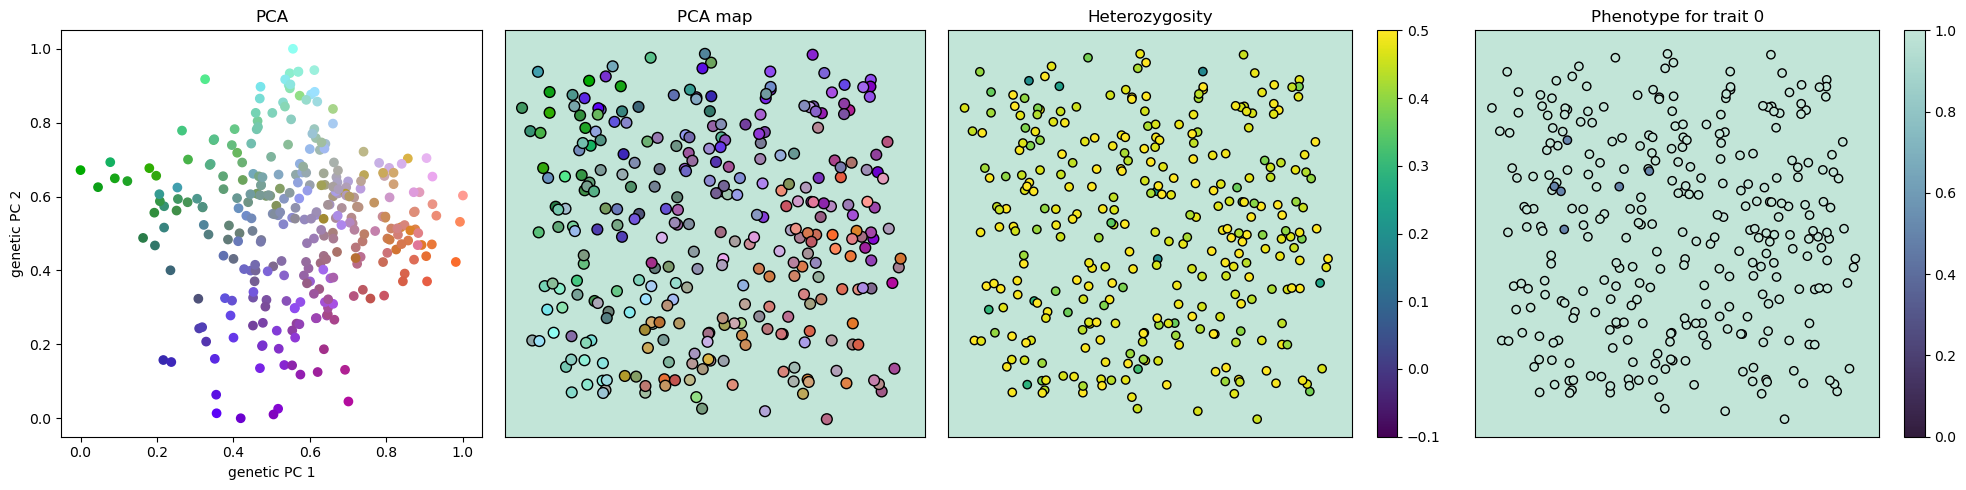

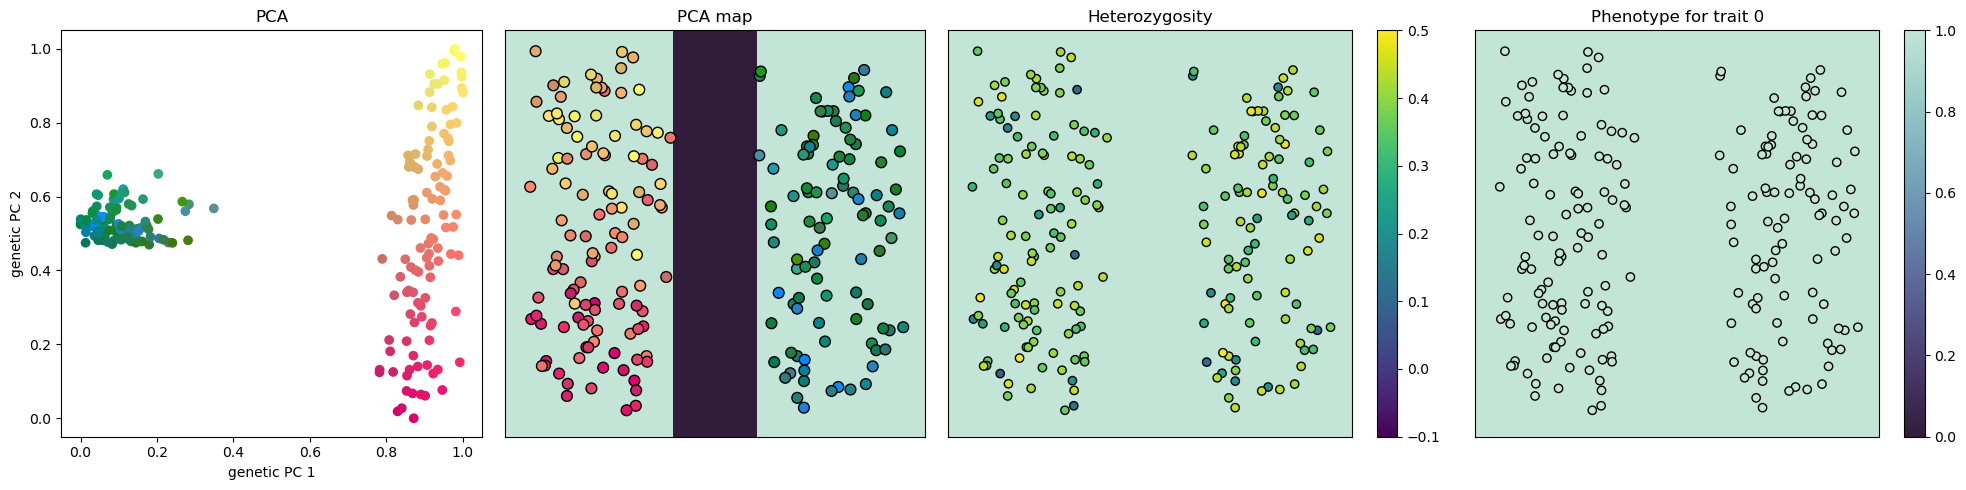

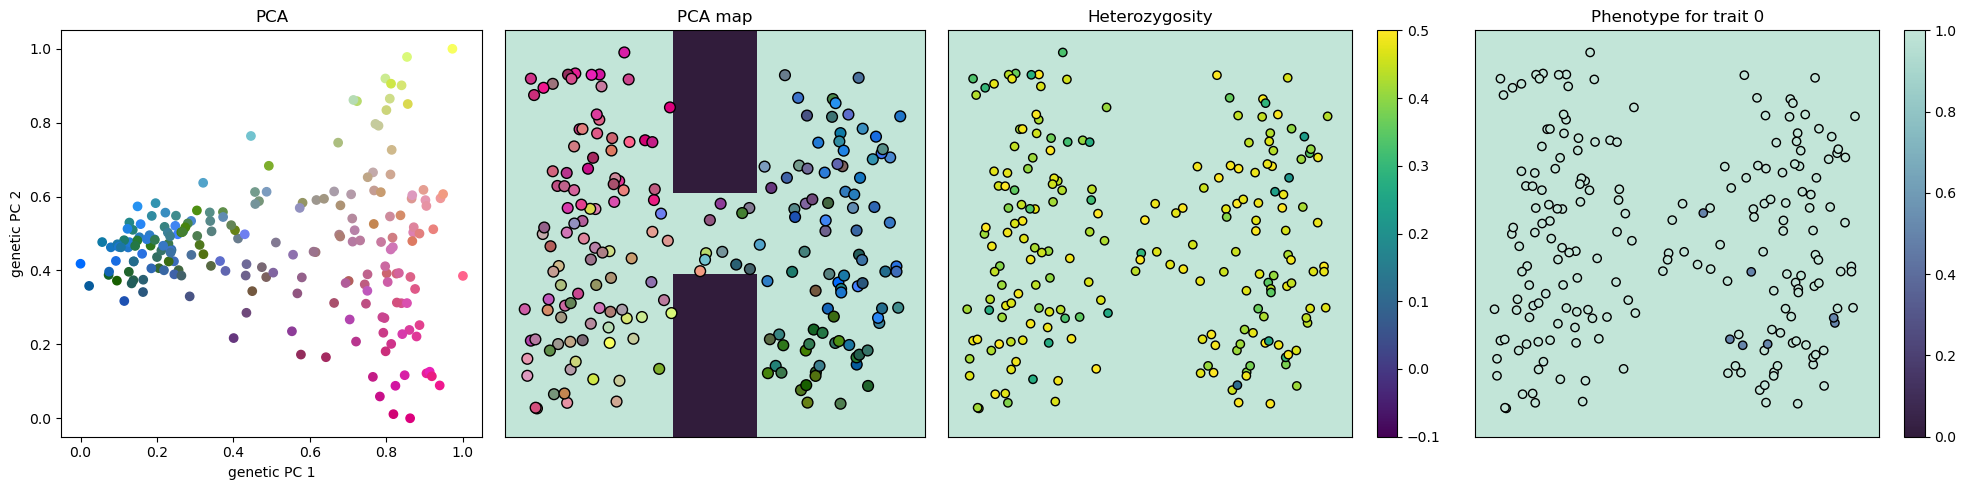

In [19]:
# No barrier
evo.plot_popgen(mod1)
# Barrier, no corridor
evo.plot_popgen(mod2)
# Barrier and corridor
evo.plot_popgen(mod3)

**Use your results from above to answer Question 1**

## Exercise 2: Optimizing land preservation for conservation

You are consulting with a conservation organization that has funds to buy a fixed number of acres of land and is trying to decide whether to build (Option 1) a large, connected, single preserve or (Option 2) several, smaller, disconnected preserves. Design a simulation to help them explore their decision.

How you design the landscapes for the simulation is up to you, but here are some suggestions:

1. Consider what you are interested in: minimizing drift? conserving phenotypic diversity? maximizing genetic diversity? If you want to keep things simple, you can focus on one of these things for your simulations. Note that if you are interested in genetic diversity, you may need to increase the model walk times to 300-500 steps.

2. Remember that they have a fixed amount of land they can buy; make sure that the total area preserved when simulating either option is the same (i.e., your small preserves should have the same summed area as your large preserve). For example, you could aim to preserve 36 cells total in both simulations and just change the arrangement of those 36 cells.

3. If you make your preserved areas too small, you may end up with extinction; this will appear as an error when running your simulations. You can describe this extinction event as a result.

4. To make things simpler, you may want to keep your preserves rectangular (i.e., not irregularly shaped)

The code we have provided for you below assumes you are running two simulations; however, you can run as many simulations as you would like by copy and pasting the code chunks.


In [20]:
# Doodle your landscapes
carrying_capacity1 = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [21]:
connectivity1 = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [22]:
environment1 = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


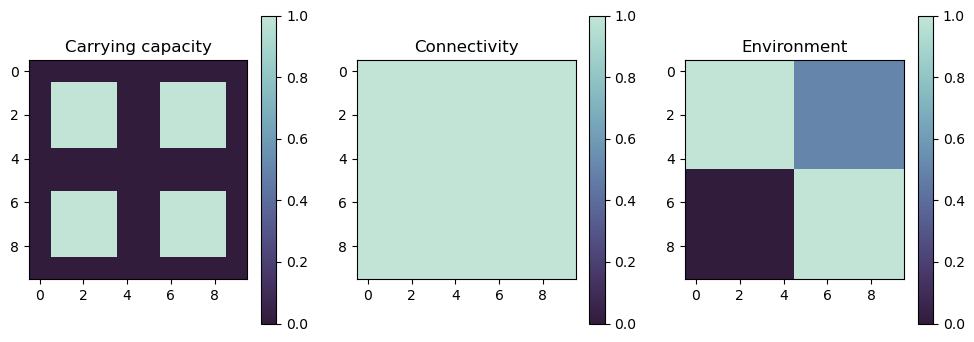

In [23]:
# Plot your landscapes
evo.plot_landscapes(carrying_capacity1, connectivity1, environment1)


MAKING MODEL...

	MAKING LANDSCAPE...

	MAKING COMMUNITY...

		MAKING SPECIES spp_0...

			making genomic architecture...



stty: 'standard input': Inappropriate ioctl for device


			making individuals...

			making movement surface...
				[can take a bit]



No mod.burn_fn_queue was found. Running mod.reset()...


Creating the burn-in function queue...


Creating the main function queue...


burn:	it=-1:	t=0
	species: spp_0                         N=160	(births=109	deaths=449)

	........................................................................
burn:	it=-1:	t=1
	species: spp_0                         N=135	(births=35	deaths=60)

	........................................................................
burn:	it=-1:	t=2
	species: spp_0                         N=108	(births=22	deaths=49)

	........................................................................
burn:	it=-1:	t=3
	species: spp_0                         N=99	(births=20	deaths=29)

	........................................................................
burn:	it=-1:	t=4
	species: spp_0                         N=99	(births=18	deaths=18)

	.........................................................

/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=39
	species: spp_0                         N=70	(births=14	deaths=11)

	........................................................................
burn:	it=-1:	t=40
	species: spp_0                         N=66	(births=12	deaths=16)

	........................................................................
burn:	it=-1:	t=41
	species: spp_0                         N=69	(births=17	deaths=14)

	........................................................................
burn:	it=-1:	t=42
	species: spp_0                         N=65	(births=14	deaths=18)

	........................................................................
burn:	it=-1:	t=43
	species: spp_0                         N=64	(births=12	deaths=13)

	........................................................................
burn:	it=-1:	t=44
	species: spp_0                         N=59	(births=11	deaths=16)

	........................................................................
burn:	it=-1:	t=45
	species: spp_0       

/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=48
	species: spp_0                         N=66	(births=20	deaths=20)

	........................................................................
burn:	it=-1:	t=49
	species: spp_0                         N=67	(births=12	deaths=11)

	........................................................................
burn:	it=-1:	t=50
	species: spp_0                         N=65	(births=13	deaths=15)

	........................................................................
burn:	it=-1:	t=51
	species: spp_0                         N=71	(births=10	deaths=4)

	........................................................................
burn:	it=-1:	t=52
	species: spp_0                         N=75	(births=18	deaths=14)

	........................................................................
burn:	it=-1:	t=53
	species: spp_0                         N=76	(births=15	deaths=14)

	........................................................................
burn:	it=-1:	t=54
	species: spp_0        

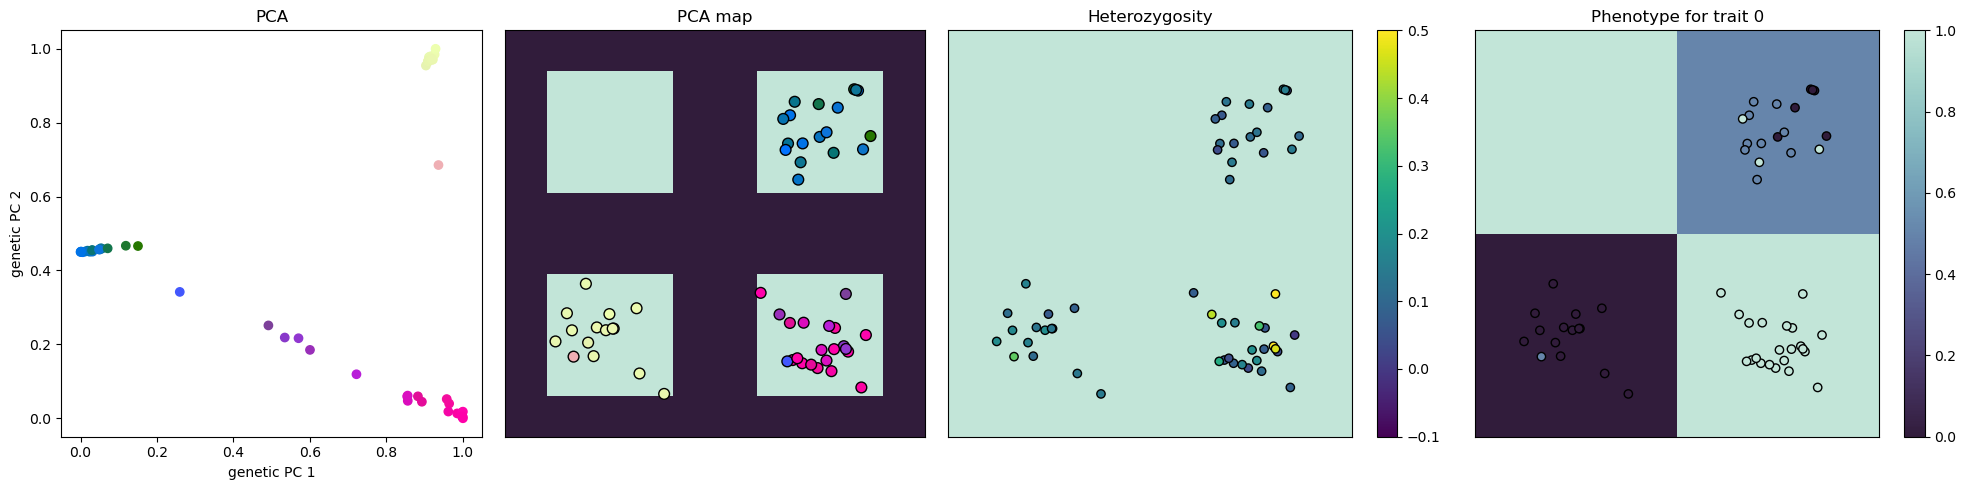

In [24]:
# Run the model with your landscapes
mod1 = evo.init_mod(params, carrying_capacity1, connectivity1, environment1)
# You can run the model for as many steps as you want by changing the argument in walk() from 200 to any other number
mod1.walk(200)
# Plot the results
evo.plot_popgen(mod1)

Now, run your second simulation (if you want to run another one after this, copy and paste the code below):

In [25]:
# Doodle your second set of landscapes (if you want to keep your landscapes the same as before, you can just click SAVE without editing the landscape)
carrying_capacity2 = evo.edit_landscape(carrying_capacity1)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [26]:
connectivity2 = evo.edit_landscape(connectivity1)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [27]:
environment2 = evo.edit_landscape(environment1)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


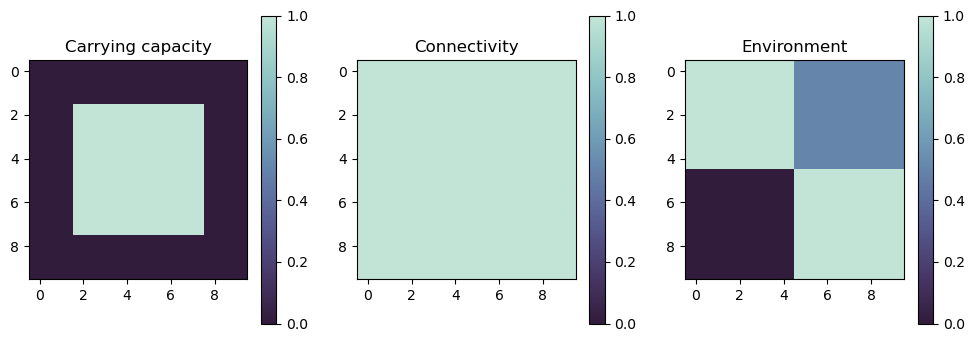

In [28]:
# Plot your landscapes
evo.plot_landscapes(carrying_capacity2, connectivity2, environment2)


MAKING MODEL...

	MAKING LANDSCAPE...

	MAKING COMMUNITY...

		MAKING SPECIES spp_0...

			making genomic architecture...



stty: 'standard input': Inappropriate ioctl for device


			making individuals...

			making movement surface...
				[can take a bit]



No mod.burn_fn_queue was found. Running mod.reset()...


Creating the burn-in function queue...


Creating the main function queue...


burn:	it=-1:	t=0
	species: spp_0                         N=148	(births=90	deaths=442)

	........................................................................
burn:	it=-1:	t=1
	species: spp_0                         N=133	(births=33	deaths=48)

	........................................................................
burn:	it=-1:	t=2
	species: spp_0                         N=124	(births=33	deaths=42)

	........................................................................
burn:	it=-1:	t=3
	species: spp_0                         N=125	(births=24	deaths=23)

	........................................................................
burn:	it=-1:	t=4
	species: spp_0                         N=125	(births=23	deaths=23)

	........................................................

/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=39
	species: spp_0                         N=91	(births=15	deaths=12)

	........................................................................
burn:	it=-1:	t=40
	species: spp_0                         N=90	(births=16	deaths=17)

	........................................................................
burn:	it=-1:	t=41
	species: spp_0                         N=92	(births=13	deaths=11)

	........................................................................
burn:	it=-1:	t=42
	species: spp_0                         N=98	(births=21	deaths=15)

	........................................................................
burn:	it=-1:	t=43
	species: spp_0                         N=98	(births=12	deaths=12)

	........................................................................
burn:	it=-1:	t=44
	species: spp_0                         N=99	(births=17	deaths=16)

	........................................................................
burn:	it=-1:	t=45
	species: spp_0       

/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=48
	species: spp_0                         N=101	(births=25	deaths=26)

	........................................................................
burn:	it=-1:	t=49
	species: spp_0                         N=97	(births=12	deaths=16)

	........................................................................
burn:	it=-1:	t=50
	species: spp_0                         N=104	(births=21	deaths=14)

	........................................................................
burn:	it=-1:	t=51
	species: spp_0                         N=104	(births=22	deaths=22)

	........................................................................
burn:	it=-1:	t=52
	species: spp_0                         N=112	(births=21	deaths=13)

	........................................................................
burn:	it=-1:	t=53
	species: spp_0                         N=115	(births=20	deaths=17)

	........................................................................
burn:	it=-1:	t=54
	species: spp_0  

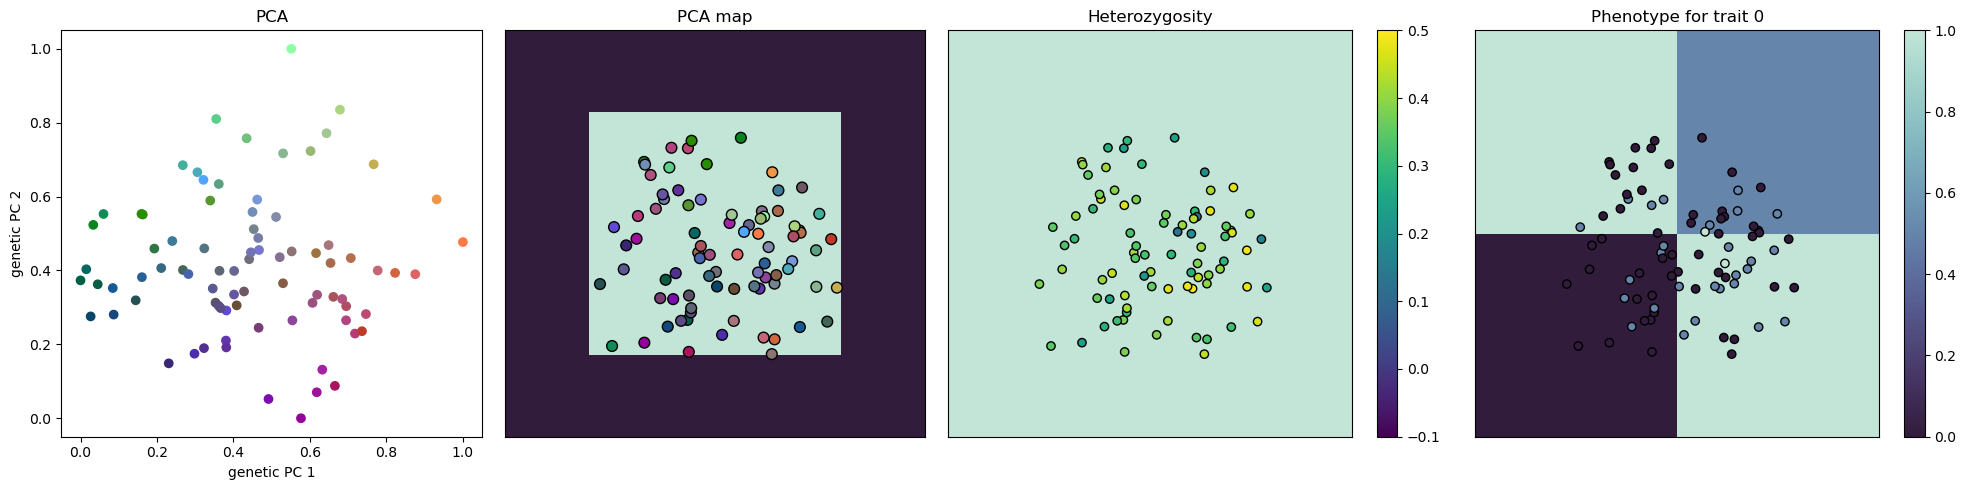

In [29]:
# Run the model with your landscapes
mod2 = evo.init_mod(params, carrying_capacity2, connectivity2, environment2)
# You can run the model for as many steps as you want by changing the argument in walk() from 200 to any other number
mod2.walk(200)
# Plot the results
evo.plot_popgen(mod2)

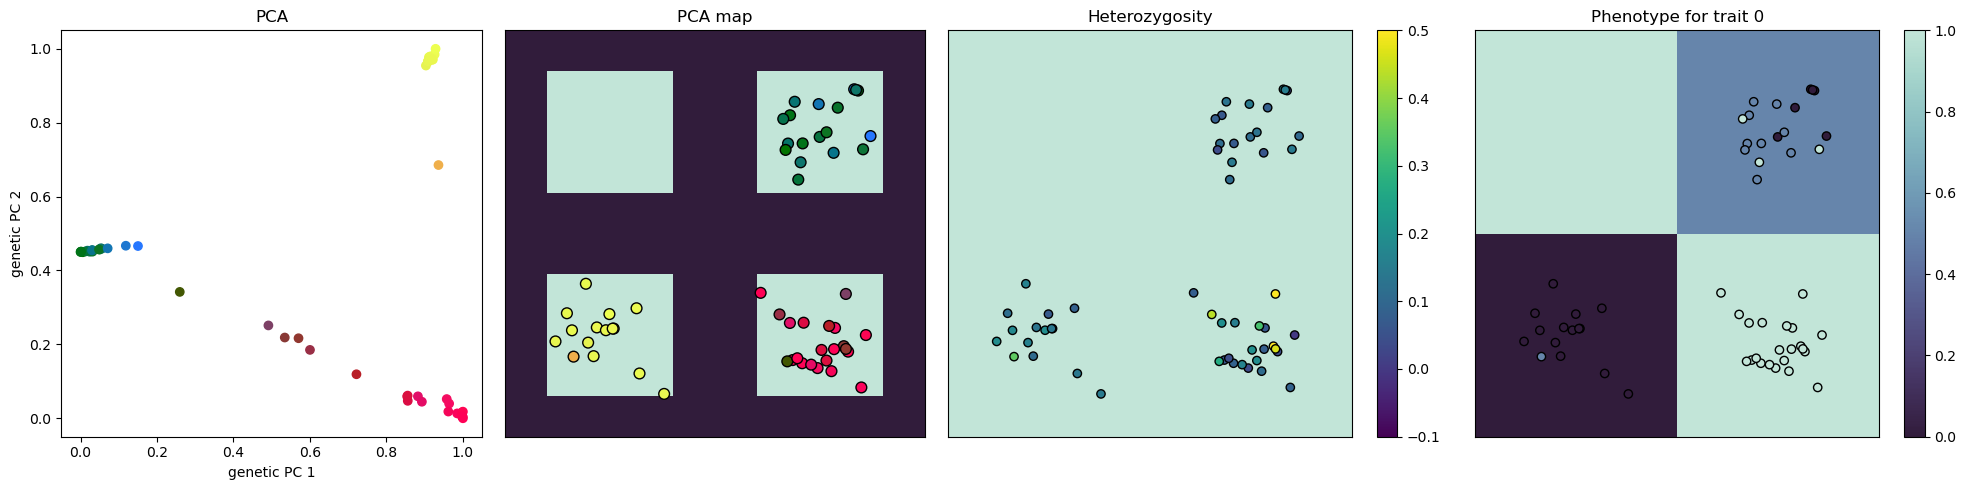

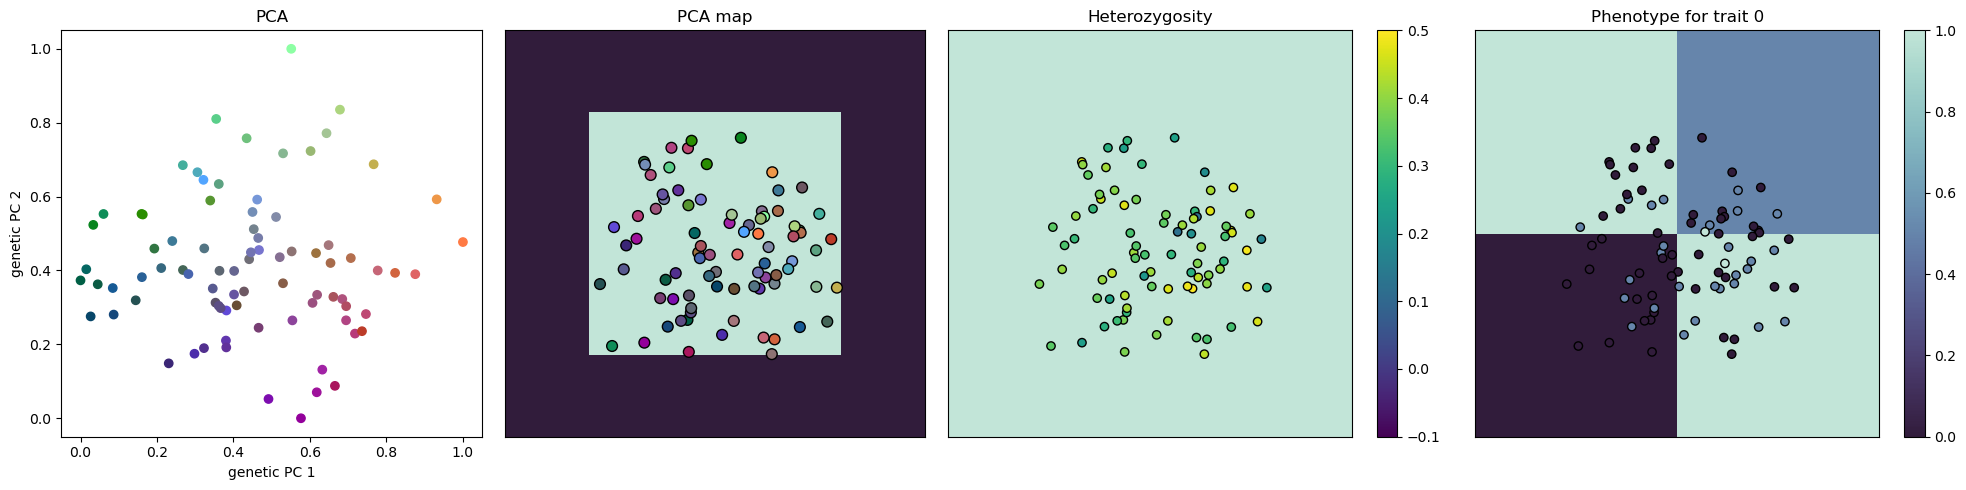

In [30]:
# Let's plot our results together to make it easier to compare
evo.plot_popgen(mod1)
evo.plot_popgen(mod2)

**Use your results to answer Question 2**

# Exercise 3: Optimizing land use for conservation

Now you are working for a logging company that is trying to figure out how to log a parcel of land while minimizing damage to a local elk population using the landscape. They need help deciding whether it is better for them to selectively remove trees evenly across the landscape or in one clear-cut area. Obviously, the amount of habitat affected matters a lot when answering a question like this, so to keep things simple let's imagine you need to log 20 cells of habitat from your 10 cell x 10 cell landscape (i.e., 20% of the habitat). If you have time, you can also test removing a larger number of cells of habitat (i.e., 60% of the habitat).

To make this a little more interesting, you have to decide for yourself what the affect of logging is on a cell of habitat. For example, it could be that a cell that is logged has a carrying capacity of zero, half the carrying capacity, half the connectivity, etc., or some combination of those. You can also decide whether local adaptation is occurring or not. Hint: If you want to use the same landscapes for carrying capacity and connectivity look at the code example above for how to copy and edit an existing landscape. 

The code we have provided for you below assumes you are running two simulations; however, you can run as many simulations as you would like by copy and pasting the code chunks below and you may want to edit them based on the code examples provided above.


In [31]:
# Doodle your landscapes
carrying_capacity3 = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [32]:
connectivity3 = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [33]:
environment3 = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


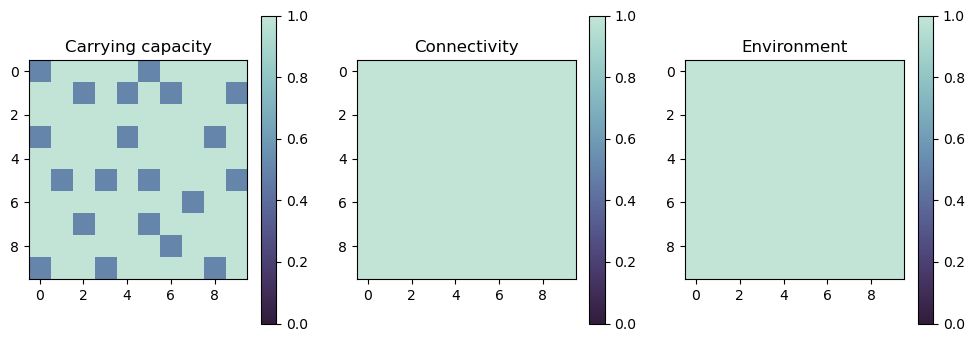

In [34]:
# Plot your landscapes
evo.plot_landscapes(carrying_capacity3, connectivity3, environment3)


MAKING MODEL...

	MAKING LANDSCAPE...

	MAKING COMMUNITY...

		MAKING SPECIES spp_0...

			making genomic architecture...



stty: 'standard input': Inappropriate ioctl for device


			making individuals...

			making movement surface...
				[can take a bit]



No mod.burn_fn_queue was found. Running mod.reset()...


Creating the burn-in function queue...


Creating the main function queue...


burn:	it=-1:	t=0
	species: spp_0                         N=372	(births=94	deaths=222)

	........................................................................
burn:	it=-1:	t=1
	species: spp_0                         N=340	(births=62	deaths=94)

	........................................................................
burn:	it=-1:	t=2
	species: spp_0                         N=333	(births=76	deaths=83)

	........................................................................
burn:	it=-1:	t=3
	species: spp_0                         N=312	(births=72	deaths=93)

	........................................................................
burn:	it=-1:	t=4
	species: spp_0                         N=304	(births=61	deaths=69)

	........................................................

/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=36
	species: spp_0                         N=256	(births=48	deaths=45)

	........................................................................
burn:	it=-1:	t=37
	species: spp_0                         N=260	(births=50	deaths=46)

	........................................................................
burn:	it=-1:	t=38
	species: spp_0                         N=253	(births=48	deaths=55)

	........................................................................
burn:	it=-1:	t=39
	species: spp_0                         N=251	(births=51	deaths=53)

	........................................................................
burn:	it=-1:	t=40
	species: spp_0                         N=230	(births=46	deaths=67)

	........................................................................
burn:	it=-1:	t=41
	species: spp_0                         N=241	(births=47	deaths=36)

	........................................................................
burn:	it=-1:	t=42
	species: spp_0 

/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=43
	species: spp_0                         N=246	(births=47	deaths=43)

	........................................................................
burn:	it=-1:	t=44
	species: spp_0                         N=246	(births=49	deaths=49)

	........................................................................
burn:	it=-1:	t=45
	species: spp_0                         N=252	(births=46	deaths=40)

	........................................................................
burn:	it=-1:	t=46
	species: spp_0                         N=255	(births=47	deaths=44)

	........................................................................
burn:	it=-1:	t=47
	species: spp_0                         N=244	(births=54	deaths=65)

	........................................................................
burn:	it=-1:	t=48
	species: spp_0                         N=243	(births=52	deaths=53)

	........................................................................
burn:	it=-1:	t=49
	species: spp_0 

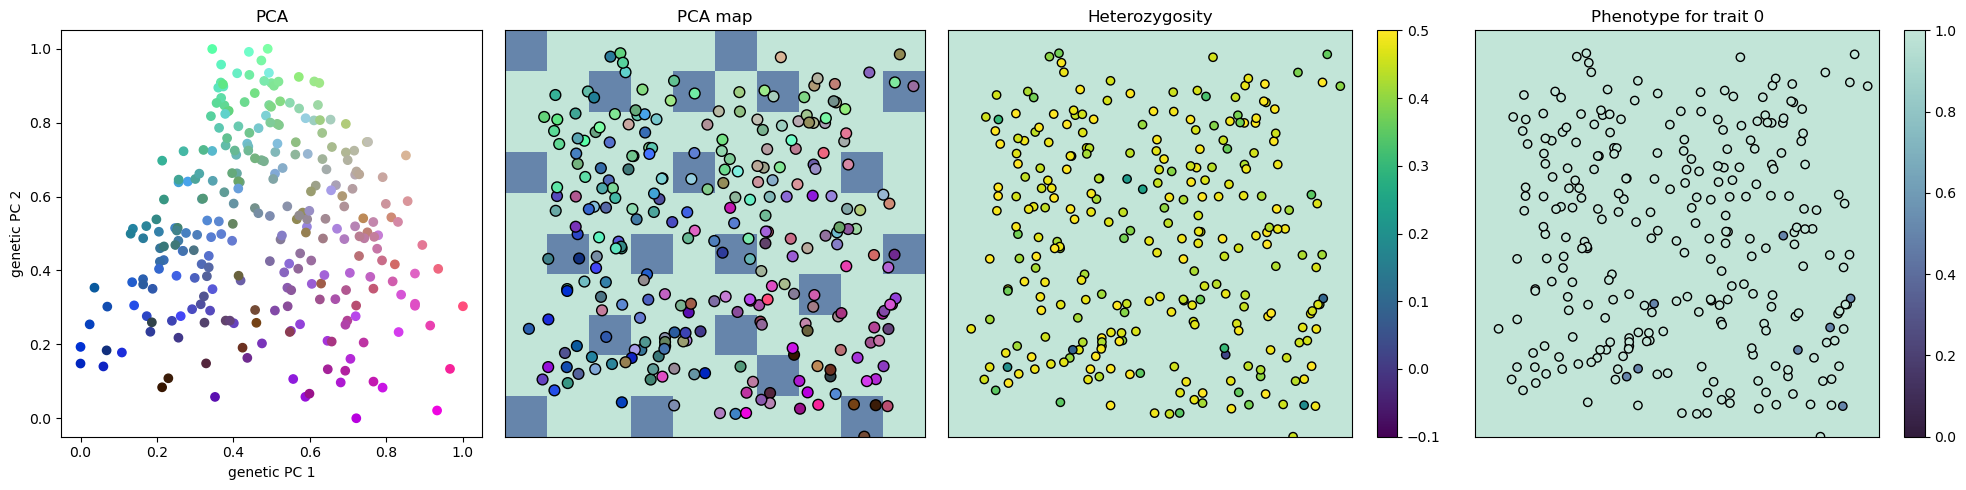

In [35]:
# Run the model with your landscapes
mod3 = evo.init_mod(params, carrying_capacity3, connectivity3, environment3)
# You can run the model for as many steps as you want by changing the argument in walk() from 200 to any other number
mod3.walk(200)
# Plot the results
evo.plot_popgen(mod3)

Now, run your second simulation (if you want to run another one after this, copy and paste the code below):

In [36]:
# Doodle your second set of landscapes (if you want to keep your landscapes the same as before, you can just click SAVE without editing the landscape). If you want to draw a completely new landscape change edit_landscape() to draw_landscape()
carrying_capacity4 = evo.edit_landscape(carrying_capacity3)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [37]:
connectivity4 = evo.edit_landscape(connectivity3)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [38]:
environment4 = evo.edit_landscape(environment3)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


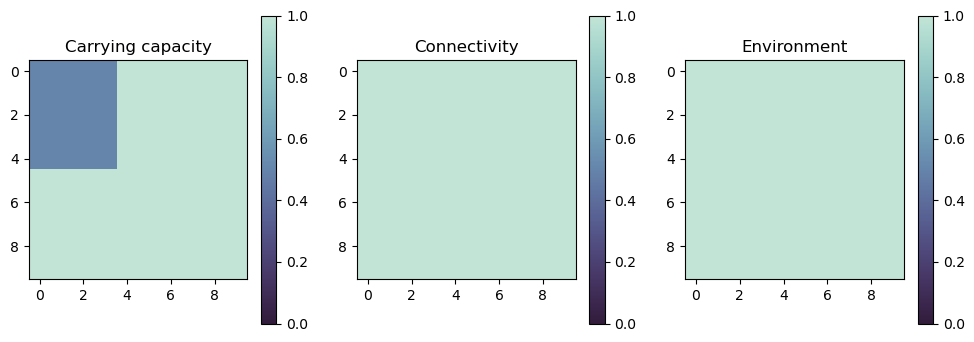

In [39]:
# Plot your landscapes
evo.plot_landscapes(carrying_capacity4, connectivity4, environment4)


MAKING MODEL...

	MAKING LANDSCAPE...

	MAKING COMMUNITY...

		MAKING SPECIES spp_0...

			making genomic architecture...



stty: 'standard input': Inappropriate ioctl for device


			making individuals...

			making movement surface...
				[can take a bit]



No mod.burn_fn_queue was found. Running mod.reset()...


Creating the burn-in function queue...


Creating the main function queue...


burn:	it=-1:	t=0
	species: spp_0                         N=363	(births=112	deaths=249)

	........................................................................
burn:	it=-1:	t=1
	species: spp_0                         N=351	(births=66	deaths=78)

	........................................................................
burn:	it=-1:	t=2
	species: spp_0                         N=315	(births=78	deaths=114)

	........................................................................
burn:	it=-1:	t=3
	species: spp_0                         N=310	(births=70	deaths=75)

	........................................................................
burn:	it=-1:	t=4
	species: spp_0                         N=306	(births=58	deaths=62)

	......................................................

/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=36
	species: spp_0                         N=256	(births=47	deaths=63)

	........................................................................
burn:	it=-1:	t=37
	species: spp_0                         N=260	(births=51	deaths=47)

	........................................................................
burn:	it=-1:	t=38
	species: spp_0                         N=258	(births=51	deaths=53)

	........................................................................
burn:	it=-1:	t=39
	species: spp_0                         N=274	(births=55	deaths=39)

	........................................................................
burn:	it=-1:	t=40
	species: spp_0                         N=269	(births=59	deaths=64)

	........................................................................
burn:	it=-1:	t=41
	species: spp_0                         N=274	(births=52	deaths=47)

	........................................................................


/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=42
	species: spp_0                         N=275	(births=66	deaths=65)

	........................................................................
burn:	it=-1:	t=43
	species: spp_0                         N=290	(births=79	deaths=64)

	........................................................................
burn:	it=-1:	t=44
	species: spp_0                         N=296	(births=66	deaths=60)

	........................................................................
burn:	it=-1:	t=45
	species: spp_0                         N=286	(births=53	deaths=63)

	........................................................................
burn:	it=-1:	t=46
	species: spp_0                         N=279	(births=55	deaths=62)

	........................................................................


/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):


burn:	it=-1:	t=47
	species: spp_0                         N=271	(births=52	deaths=60)

	........................................................................
burn:	it=-1:	t=48
	species: spp_0                         N=277	(births=52	deaths=46)

	........................................................................
burn:	it=-1:	t=49
	species: spp_0                         N=274	(births=49	deaths=52)

	........................................................................
burn:	it=-1:	t=50
	species: spp_0                         N=273	(births=46	deaths=47)

	........................................................................
burn:	it=-1:	t=51
	species: spp_0                         N=262	(births=49	deaths=60)

	........................................................................
burn:	it=-1:	t=52
	species: spp_0                         N=270	(births=50	deaths=42)

	........................................................................
burn:	it=-1:	t=53
	species: spp_0 

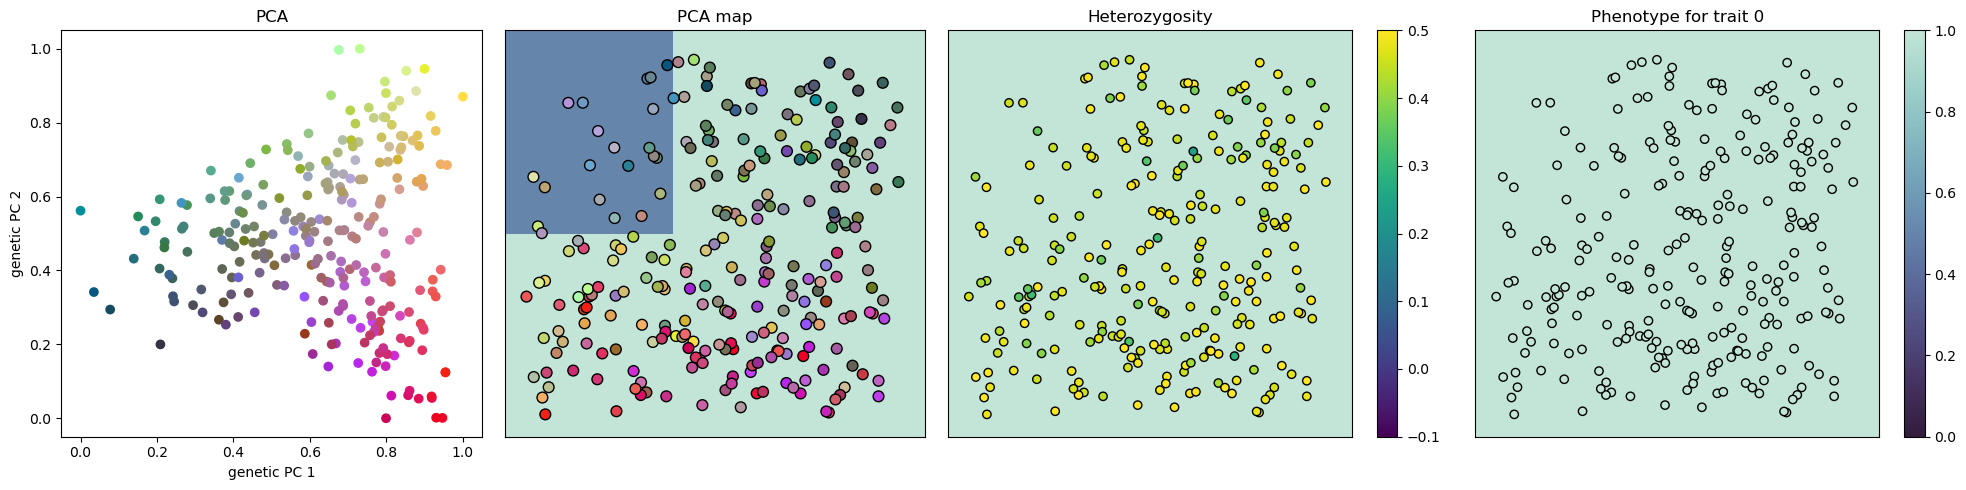

In [40]:
# Run the model with your landscapes
mod4 = evo.init_mod(params, carrying_capacity4, connectivity4, environment4)
# You can run the model for as many steps as you want by changing the argument in walk() from 200 to any other number
mod4.walk(200)
# Plot the results
evo.plot_popgen(mod4)

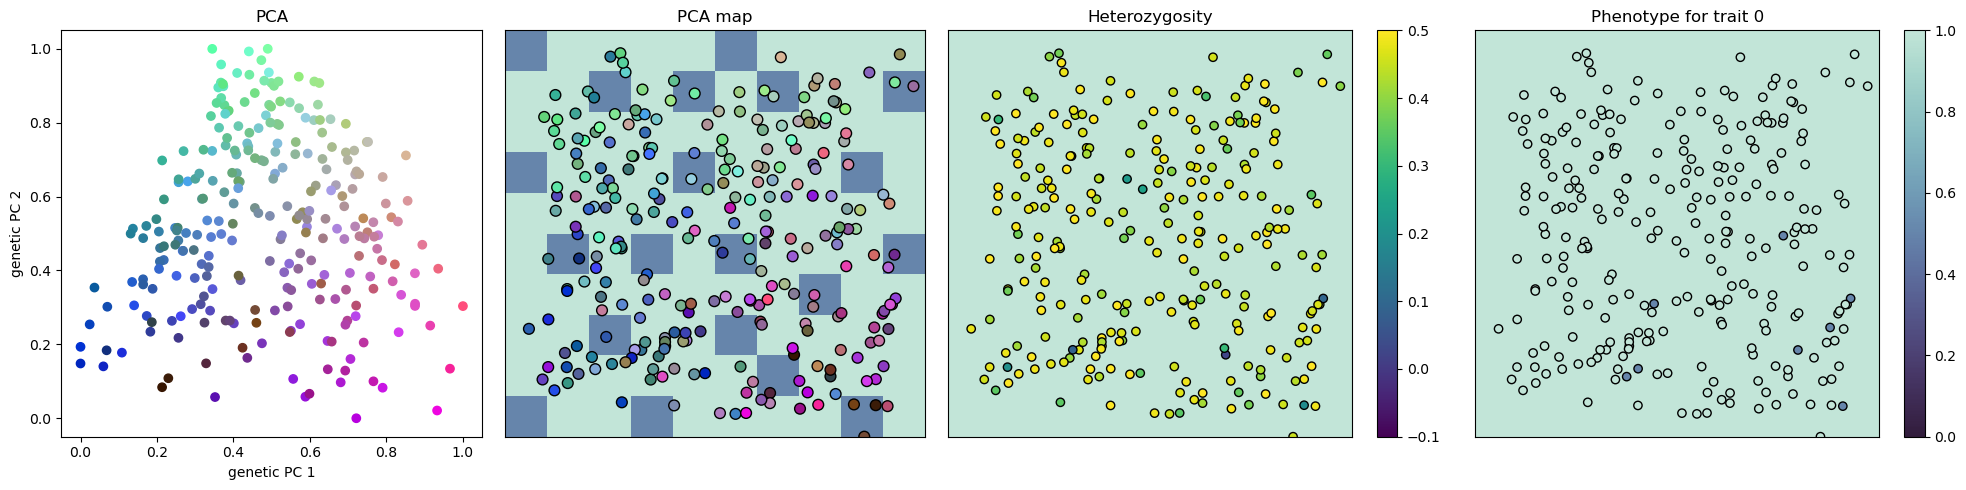

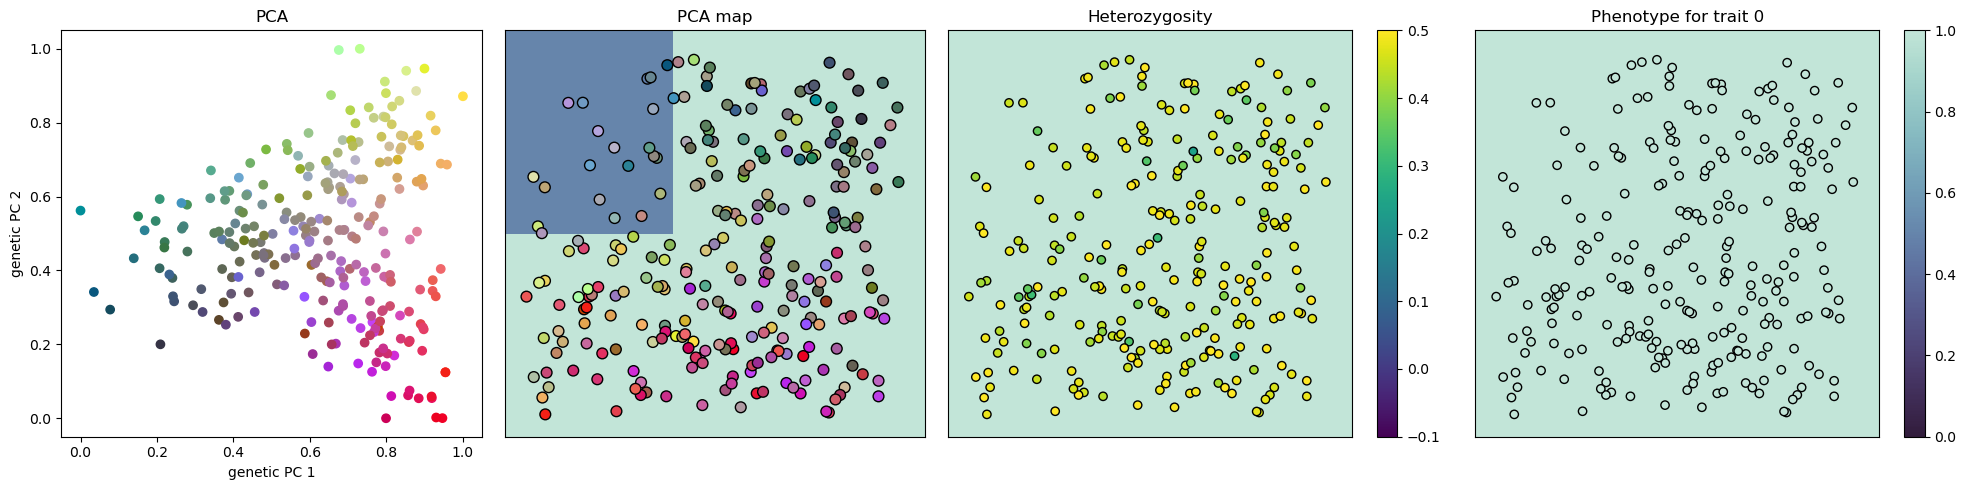

In [41]:
# Plot your results side-by-side
evo.plot_popgen(mod3)
evo.plot_popgen(mod4)

**Use the results above to answer Question 3**

# Exercise 4: Changing species parameters

So far, we have only used the evodoodle default simulation parameters; this means that for all of our simulations, we have used the same underlying species parameters (e.g., selection strength, mating radius, etc.). Pick one of the Exercise scenarios above and test the effect of changing one of the following parameters. Make sure to write down your hypothesis before you run your simulation:

<b>Parameters to tweak</b>:
- ***phi***: *This controls the strength of selection on the trait. It can be set to 0 <= value <= 1.*

- ***n_loci***: *This controls the number of genetic loci underlying the trait's phenotype. For this simulation, it can be set to 1 <= value <= 100.* (Remember, most traits are not controlled by a single gene, so this can be an important factor in the real world)

- ***K_factor***: *This controls the population density, by setting the number of individuals that can inhabit each cell. It can be set to any value > 0, technically, but values larger than 3 or 4 will probably require too much memory to run on this server, so be careful!*  Higher and lower population density can have a number of impacts- like ability to find mates, availability of resources, etc.  Founder effects are hugely important here as well.

- ***movement_distance_distr_param_1***: *This controls the average distance that an individual moves each time step (in units of cell-widths), and thus how mobile the species is. For this simulation, it can be set to any value > 0 (but very large values might cause problems!).*

- ***mating_radius***: *This controls the radius (expressed in cell-width units) within which an indivudal can choose a mate. For this simulation, it can be set to any value > 0.*
</div>

In [60]:
# to change selection strength (phi), change 0.05 to any value between 0 and 1
params['comm']['species']['spp_0']['gen_arch']['traits']['trait_0']['phi'] = 0.05
# to change the number of loci (n_loci), change 1 to any value between 1 and 100
params['comm']['species']['spp_0']['gen_arch']['traits']['trait_0']['n_loci'] = 1
# to change the carrying capacity factor (K), change 1 to any value greater than 0
params['comm']['species']['spp_0']['init']['K_factor'] = 5
# to change the mean movement distance (movement_distance_distr_param1), change 0.5 to any value greater than 0
params['comm']['species']['spp_0']['movement']['movement_distance_distr_param1'] = 0.5
# to change the mating radius (mating_radius), change 10 to any value greater than 0
params['comm']['species']['spp_0']['mating']['mating_radius'] = 4

In [61]:
# Doodle your landscapes
carrying_capacity5 = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [62]:
connectivity5 = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [63]:
environment5 = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


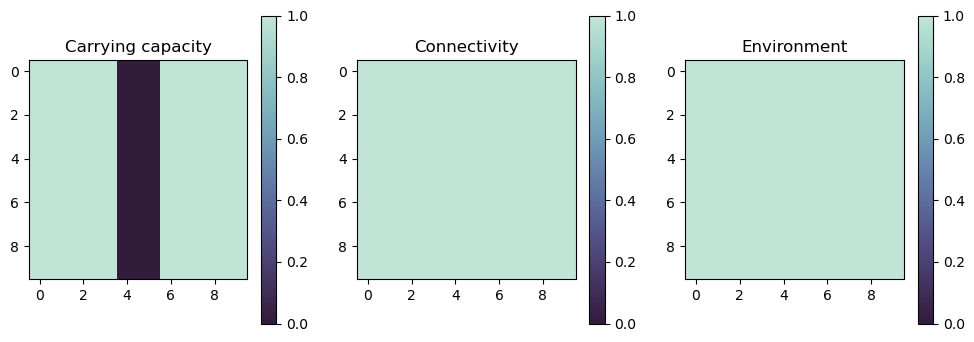

In [64]:
# Plot your landscapes
evo.plot_landscapes(carrying_capacity5, connectivity5, environment5)


MAKING MODEL...

	MAKING LANDSCAPE...

	MAKING COMMUNITY...

		MAKING SPECIES spp_0...

			making genomic architecture...



stty: 'standard input': Inappropriate ioctl for device


			making individuals...

			making movement surface...
				[can take a bit]



No mod.burn_fn_queue was found. Running mod.reset()...


Creating the burn-in function queue...


Creating the main function queue...


burn:	it=-1:	t=0
	species: spp_0                         N=339	(births=102	deaths=263)

	........................................................................
burn:	it=-1:	t=1
	species: spp_0                         N=296	(births=61	deaths=104)

	........................................................................
burn:	it=-1:	t=2
	species: spp_0                         N=284	(births=66	deaths=78)

	........................................................................
burn:	it=-1:	t=3
	species: spp_0                         N=261	(births=52	deaths=75)

	........................................................................
burn:	it=-1:	t=4
	species: spp_0                         N=250	(births=54	deaths=65)

	......................................................

/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=37
	species: spp_0                         N=187	(births=46	deaths=47)

	........................................................................
burn:	it=-1:	t=38
	species: spp_0                         N=185	(births=35	deaths=37)

	........................................................................
burn:	it=-1:	t=39
	species: spp_0                         N=192	(births=43	deaths=36)

	........................................................................
burn:	it=-1:	t=40
	species: spp_0                         N=196	(births=42	deaths=38)

	........................................................................
burn:	it=-1:	t=41
	species: spp_0                         N=209	(births=40	deaths=27)

	........................................................................
burn:	it=-1:	t=42
	species: spp_0                         N=209	(births=43	deaths=43)

	........................................................................
burn:	it=-1:	t=43
	species: spp_0 

/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=45
	species: spp_0                         N=198	(births=42	deaths=43)

	........................................................................
burn:	it=-1:	t=46
	species: spp_0                         N=196	(births=43	deaths=45)

	........................................................................
burn:	it=-1:	t=47
	species: spp_0                         N=214	(births=40	deaths=22)

	........................................................................
burn:	it=-1:	t=48
	species: spp_0                         N=218	(births=45	deaths=41)

	........................................................................
burn:	it=-1:	t=49
	species: spp_0                         N=202	(births=37	deaths=53)

	........................................................................
burn:	it=-1:	t=50
	species: spp_0                         N=201	(births=41	deaths=42)

	........................................................................
burn:	it=-1:	t=51
	species: spp_0 

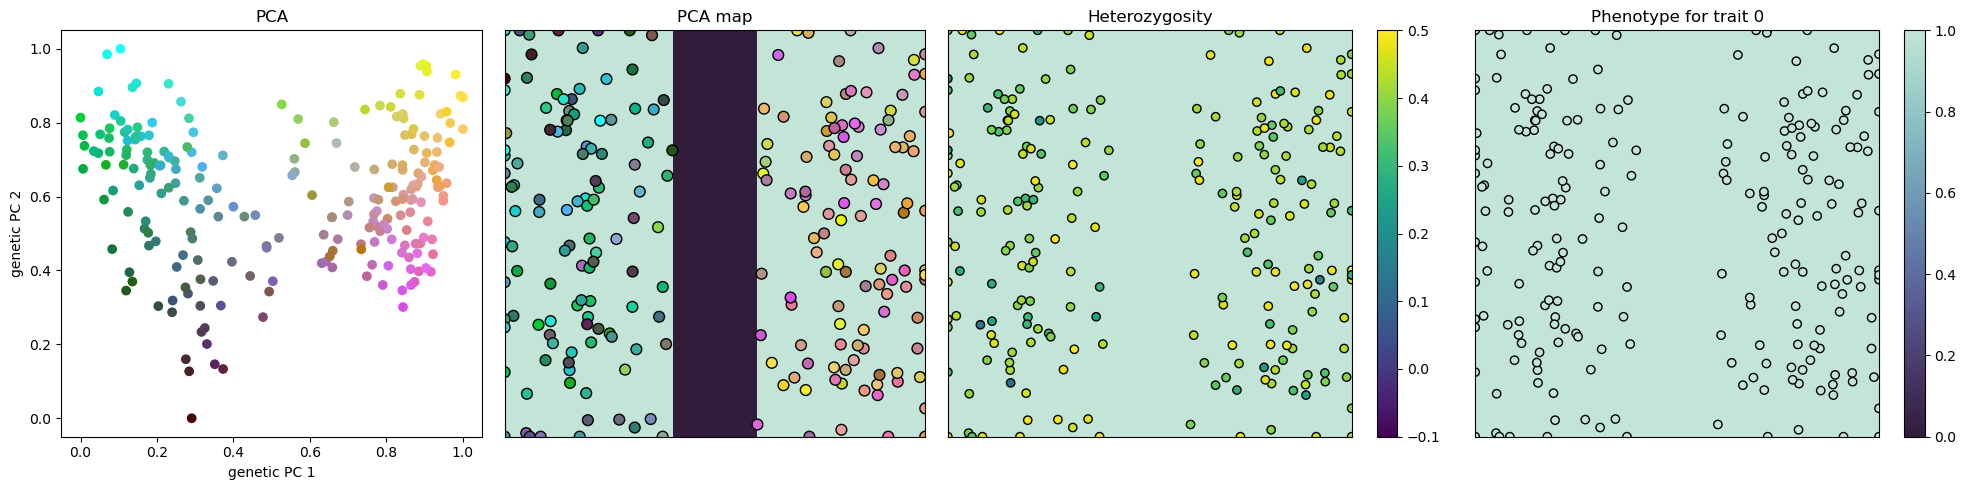

In [65]:
# Run the model with your landscapes
mod5 = evo.init_mod(params, carrying_capacity5, connectivity5, environment5)
# You can run the model for as many steps as you want by changing the argument in walk() from 200 to any other number
mod5.walk(200)
# Plot the results
evo.plot_popgen(mod5)

Now, run your second simulation (if you want to run another one after this, copy and paste the code below):

In [66]:
# Doodle your second set of landscapes (if you want to keep your landscapes the same as before, you can just click SAVE without editing the landscape). If you want to draw a completely new landscape change edit_landscape() to draw_landscape()
carrying_capacity6 = evo.edit_landscape(carrying_capacity5)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [67]:
connectivity6 = evo.edit_landscape(connectivity5)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [68]:
environment6 = evo.edit_landscape(environment5)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


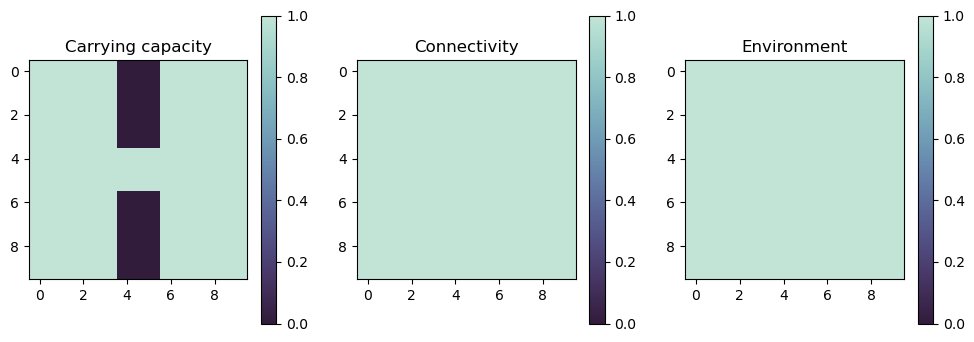

In [69]:
# Plot your landscapes
evo.plot_landscapes(carrying_capacity6, connectivity6, environment6)


MAKING MODEL...

	MAKING LANDSCAPE...

	MAKING COMMUNITY...

		MAKING SPECIES spp_0...

			making genomic architecture...



stty: 'standard input': Inappropriate ioctl for device


			making individuals...

			making movement surface...
				[can take a bit]



No mod.burn_fn_queue was found. Running mod.reset()...


Creating the burn-in function queue...


Creating the main function queue...


burn:	it=-1:	t=0
	species: spp_0                         N=372	(births=94	deaths=222)

	........................................................................
burn:	it=-1:	t=1
	species: spp_0                         N=314	(births=76	deaths=134)

	........................................................................
burn:	it=-1:	t=2
	species: spp_0                         N=282	(births=56	deaths=88)

	........................................................................
burn:	it=-1:	t=3
	species: spp_0                         N=264	(births=58	deaths=76)

	........................................................................
burn:	it=-1:	t=4
	species: spp_0                         N=260	(births=55	deaths=59)

	.......................................................

/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=37
	species: spp_0                         N=282	(births=59	deaths=71)

	........................................................................
burn:	it=-1:	t=38
	species: spp_0                         N=261	(births=52	deaths=73)

	........................................................................
burn:	it=-1:	t=39
	species: spp_0                         N=252	(births=52	deaths=61)

	........................................................................
burn:	it=-1:	t=40
	species: spp_0                         N=252	(births=49	deaths=49)

	........................................................................
burn:	it=-1:	t=41
	species: spp_0                         N=255	(births=46	deaths=43)

	........................................................................
burn:	it=-1:	t=42
	species: spp_0                         N=248	(births=56	deaths=63)

	........................................................................


/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=43
	species: spp_0                         N=251	(births=54	deaths=51)

	........................................................................
burn:	it=-1:	t=44
	species: spp_0                         N=251	(births=52	deaths=52)

	........................................................................
burn:	it=-1:	t=45
	species: spp_0                         N=243	(births=47	deaths=55)

	........................................................................
burn:	it=-1:	t=46
	species: spp_0                         N=238	(births=49	deaths=54)

	........................................................................
burn:	it=-1:	t=47
	species: spp_0                         N=243	(births=55	deaths=50)

	........................................................................
burn:	it=-1:	t=48
	species: spp_0                         N=239	(births=42	deaths=46)

	........................................................................
burn:	it=-1:	t=49
	species: spp_0 

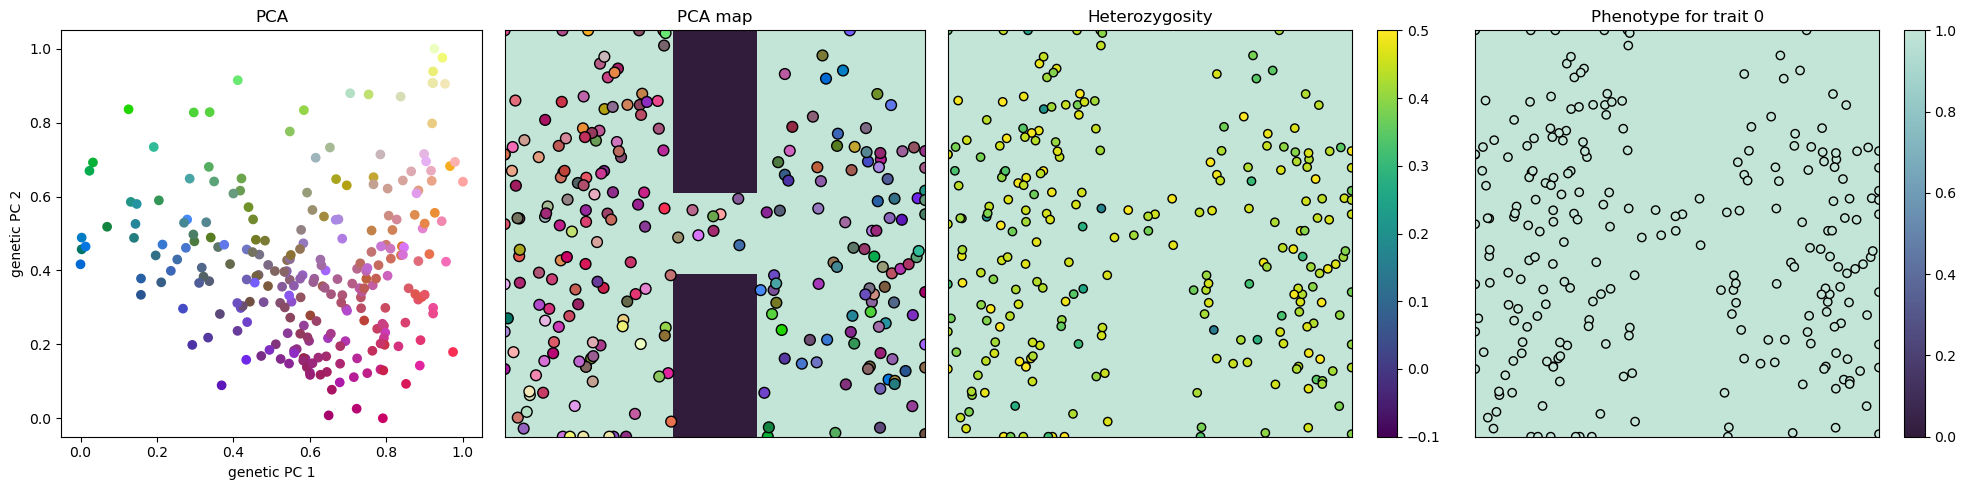

In [70]:
# Run the model with your landscapes
mod6 = evo.init_mod(params, carrying_capacity6, connectivity6, environment6)
# You can run the model for as many steps as you want by changing the argument in walk() from 200 to any other number
mod6.walk(200)
# Plot the results
evo.plot_popgen(mod6)

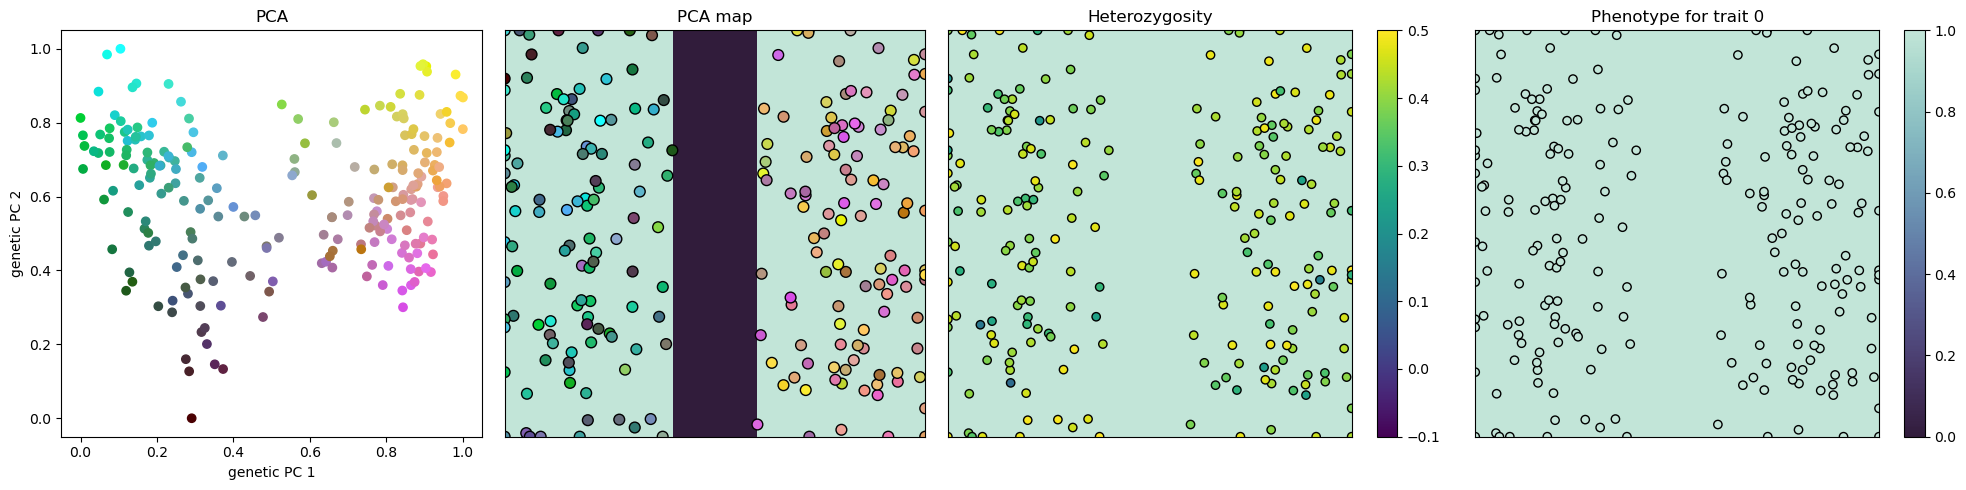

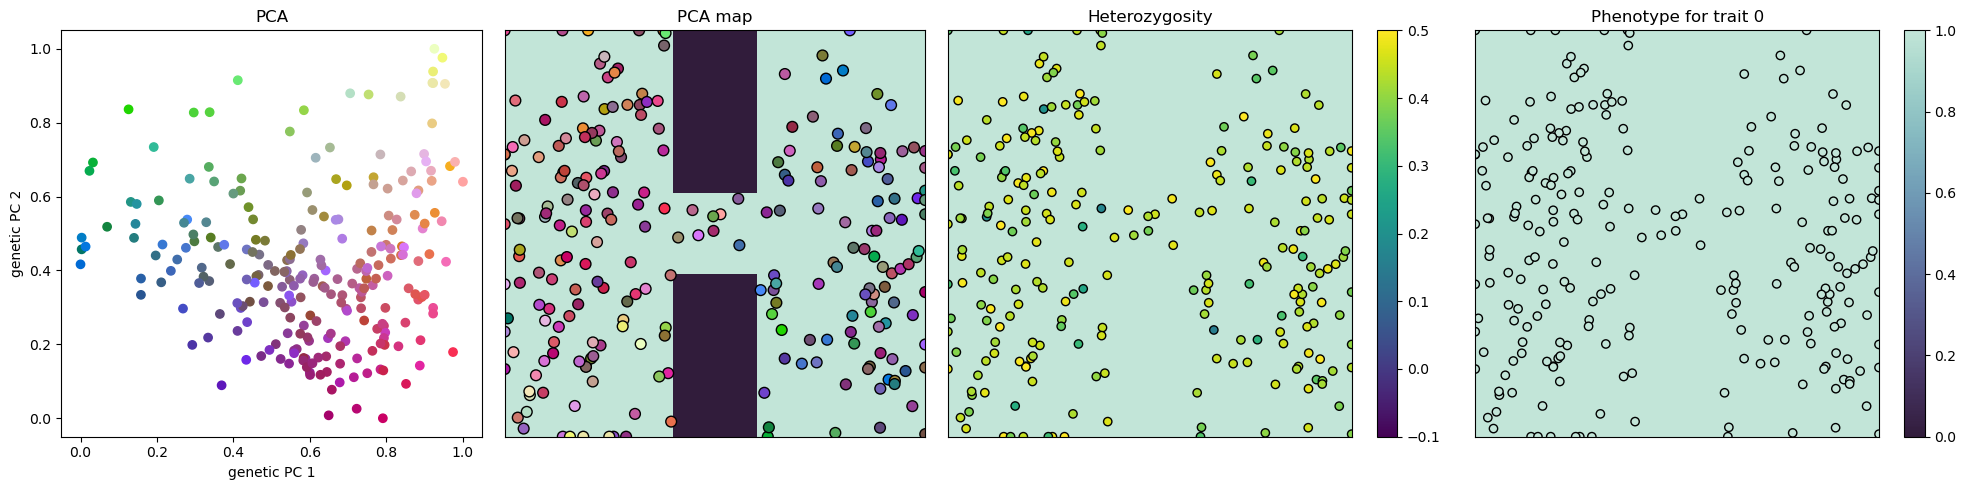

In [71]:
# Plot your results side-by-side
evo.plot_popgen(mod5)
evo.plot_popgen(mod6)

This notebook was developed by Anusha Bishop (2024)